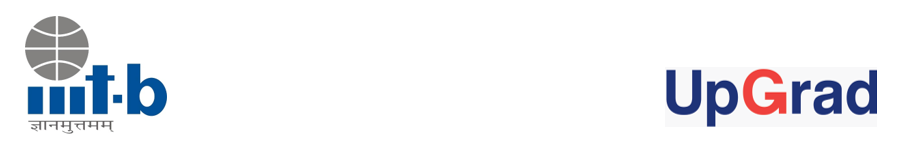

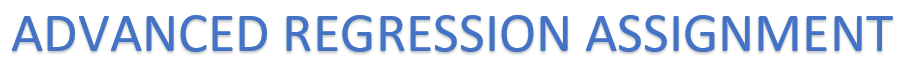

# 1. Business Understanding

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 
### The company wants to know:

#### - Which variables are significant in predicting the price of a house, and
#### - How well those variables describe the price of a house.
#### Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# 2. Data Understanding

## Steps to be followed:

- Importing, reading and understanding the data
    - Importing dataset
    - Reading dataset
    - Checking for shape of the dataset
    - Checking for null values
    - Checking for statistical summary
- Data Cleaning
    - Creating Derived Metrics
    - Checking for outliers
    - Removing columns which are not required by the model
- Data Analysis & Visualization
    - Univariate Analysis
    - Bivariate Analysis
        - Analysing the categorical variables
        - Analysing the continuous variables    

## a) Importing, reading and understanding the data

### Importing the necessary libraries

In [1]:
# suppressing warnings

import warnings
warnings.filterwarnings('ignore')


# importing all the necessary libraries

import numpy as np # for mathematical computations
import pandas as pd # for manipulating data
import datetime # for checking the current year
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
import seaborn as sns # for visualization

import statsmodels.api as sm # for building linear regression models
from sklearn.model_selection import train_test_split, GridSearchCV # to split the dataset into train set and test set
from sklearn.preprocessing import MinMaxScaler # for rescalimg of variables
from sklearn.feature_selection import RFE # for using the Recursive Feature Selection method for feature selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso # for using LinearRegression class to run RFE method
from sklearn.metrics import mean_squared_error, r2_score # for checking the mean squared error and the r-squared
from statsmodels.stats.outliers_influence import variance_inflation_factor # to compute the VIF of the variables

### Importing and reading the dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### From the above data, we can see that the variables, 'MSSubClass', 'OverallQual', 'OverallCond' all are the categorical variables other than binary variables.<br>For better readability for our analysis, we will replace the numerical values of these variables with the associated categorical string values as per the data dictionary. This will further help us in creating dummy variables during data preparation for modelling.

In [3]:
# replacing the numerical values of 'MSSubClass' variable with its associated categorical string values

df.MSSubClass.replace({20:'1-STORY 1946 & NEWER',
                       30:'1-STORY 1945 & OLDER',
                       40:'1-STORY W/FINISHED ATTIC',
                       45:'1-1/2 STORY - UNFINISHED',
                       50:'1-1/2 STORY FINISHED',
                       60:'2-STORY 1946 & NEWER',
                       70:'2-STORY 1945 & OLDER',
                       75:'2-1/2 STORY',
                       80:'SPLIT OR MULTI-LEVEL',
                       85:'SPLIT FOYER',
                       90:'DUPLEX',
                      120:'1-STORY PUD',
                      150:'1-1/2 STORY PUD',
                      160:'2-STORY PUD',
                      180:'PUD - MULTILEVEL',
                      190:'2 FAMILY CONVERSION'}, inplace=True)

In [4]:
# replacing the numerical values of 'OverallQual' variable with its associated categorical string values

df.OverallQual.replace({10:'Very_Excellent',
                         9:'Excellent',
                         8:'Very_Good',
                         7:'Good',
                         6:'Above_Average',
                         5:'Average',
                         4:'Below_Average',
                         3:'Fair',
                         2:'Poor',
                         1:'Very_Poor'}, inplace=True)

In [5]:
# replacing the numerical values of 'OverallCond' variable with its associated categorical string values

df.OverallCond.replace({10:'Very_Excellent',
                         9:'Excellent',
                         8:'Very_Good',
                         7:'Good',
                         6:'Above_Average',
                         5:'Average',
                         4:'Below_Average',
                         3:'Fair',
                         2:'Poor',
                         1:'Very_Poor'}, inplace=True)

### Checking the shape of the dataset

In [6]:
df.shape

(1460, 81)

### Checking for statistical summary of the dataset

In [7]:
df.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452  ...   
std     181.066207   456.098091   161.319273   441.866955   438.705324  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000   223.000000   795.750000  ...   
50%       0.000000   383.500000     0.000000   477.500000   991.500000  ...   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000  ...   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 35 columns]

#### There are total 1460 rows and 81 columns in the dataset.

### Checking for any null values in the dataset and also the datatype of each column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

As seen from the above, there a lot of null values which we need to deal with.

In [9]:
# droppping the 'Id' as it is of no significance

df.drop(['Id'], axis=1, inplace=True)

In [10]:
# checking the percentage of Null values

df_missing=pd.DataFrame((round(100*(df.isnull().sum()/len(df.index)), 2)), columns=['null_values'])
df_missing.sort_values(by=['null_values'], ascending=False).head(20)

null_values
PoolQC              99.52
MiscFeature         96.30
Alley               93.77
Fence               80.75
FireplaceQu         47.26
LotFrontage         17.74
GarageYrBlt          5.55
GarageCond           5.55
GarageType           5.55
GarageFinish         5.55
GarageQual           5.55
BsmtExposure         2.60
BsmtFinType2         2.60
BsmtCond             2.53
BsmtQual             2.53
BsmtFinType1         2.53
MasVnrArea           0.55
MasVnrType           0.55
Electrical           0.07
MSSubClass           0.00

As we see the highest percentage of 'NA' values i.e. more than 80%, are in the columns 'PoolQC', 'MiscFeature', 'Alley', 'Fence'. Hence, we can drop these columns as these won't help much in the analysis.
Even though 'NA' in these variables mean the absence of that feature; however, the percentage being more than 80%, we can say that these variables are not really required for the analysis.

In [11]:
# dropping the variables -'PoolQC','MiscFeature', 'Alley', 'Fence'

df.drop(['PoolQC','MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

In [12]:
# again checking for the null values percentage

df_missing=pd.DataFrame((round(100*(df.isnull().sum()/len(df.index)), 2)), columns=['null_values'])
df_missing.sort_values(by=['null_values'], ascending=False).head(20)

null_values
FireplaceQu         47.26
LotFrontage         17.74
GarageType           5.55
GarageYrBlt          5.55
GarageFinish         5.55
GarageQual           5.55
GarageCond           5.55
BsmtExposure         2.60
BsmtFinType2         2.60
BsmtQual             2.53
BsmtCond             2.53
BsmtFinType1         2.53
MasVnrType           0.55
MasVnrArea           0.55
Electrical           0.07
Fireplaces           0.00
KitchenQual          0.00
KitchenAbvGr         0.00
BedroomAbvGr         0.00
HalfBath             0.00

Now, for rest of the variables with null values, as the number of rows is less, we will not drop these, instead, we will try to impute these missing values.

### Imputing the null values

Checking each column individually out of the below columns with null values:

['FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea', 'Electrical']

In [13]:
# first, checking the 'FireplaceQu' column
# imputing the 'NA' values with the 'No_Fireplace'

df.FireplaceQu.fillna('No_Fireplace', inplace=True)

In [14]:
df.FireplaceQu.value_counts()

No_Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [15]:
# checking the 'LotFrontage' column
# imputing the 'NA' values with the median

df.LotFrontage.fillna(df['LotFrontage'].median(), inplace=True)
df.LotFrontage.isnull().sum()

0

In [16]:
# for 'GarageYrBlt' column, there is no year available for the ones with no garage
# for 'MasVnrType' column, masonry veneer is not available so will impute it with 'None'
# for 'MasVnrArea' column, imputing the null values to 0 since masonry veneer is not available for these values
# for 'Electrical' column, no electrical system is available so imputing it with 'Other'

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['Electrical'] = df['Electrical'].fillna("Other")

In [17]:
# imputing the NA values in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'] with 'No_Garage'

for i in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[i] = df[i].fillna('No_Garage')

In [18]:
# again checking for the null values percentage

df_missing=pd.DataFrame((round(100*(df.isnull().sum()/len(df.index)), 2)), columns=['null_values'])
df_missing.sort_values(by=['null_values'], ascending=False).head(20)

null_values
BsmtExposure         2.60
BsmtFinType2         2.60
BsmtCond             2.53
BsmtFinType1         2.53
BsmtQual             2.53
Fireplaces           0.00
Functional           0.00
TotRmsAbvGrd         0.00
KitchenQual          0.00
KitchenAbvGr         0.00
BedroomAbvGr         0.00
MSSubClass           0.00
1stFlrSF             0.00
HalfBath             0.00
FullBath             0.00
BsmtHalfBath         0.00
BsmtFullBath         0.00
GrLivArea            0.00
LowQualFinSF         0.00
FireplaceQu          0.00

Checking for all the features related to Basement. These are: ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond') 

In [19]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [20]:
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [21]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [22]:
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [23]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

There is one particular row where the basement's information is a little ambiguous. Under 'BsmtQual', the row contains value 'Gd' meaning good while in other column 'BsmtExposure', it says 'NA' meaning no basement. In such a case, we would rather delete the row (since it is only one row).

In [24]:
# finding the index of above mentioned row and dropping it

index_name = df[(df['BsmtQual'] == 'Gd') & (df['BsmtExposure'].isna())].index
df.drop(index_name, inplace = True)

In [25]:
# checking for the shape of the dataset

df.shape

(1459, 76)

In [26]:
# imputing the 'NA' values with 'No_Basement'

for i in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    df[i] = df[i].fillna('No_Basement')

In [27]:
# again checking for the null values percentage

df_missing=pd.DataFrame((round(100*(df.isnull().sum()/len(df.index)), 2)), columns=['null_values'])
df_missing.sort_values(by=['null_values'], ascending=False)

null_values
MSSubClass           0.0
HalfBath             0.0
FireplaceQu          0.0
Fireplaces           0.0
Functional           0.0
...                  ...
MasVnrArea           0.0
MasVnrType           0.0
Exterior2nd          0.0
Exterior1st          0.0
SalePrice            0.0

[76 rows x 1 columns]

As we see from above, there are no more null values in our dataset. So, we can proceed with the next step of data cleaning.

## b) Data Cleaning

### Creating Derived Metrics

Creating a new column 'PropertyAge' to check for the age of the property. We might use this derived metric in our analysis.

In [28]:
df['Current Year'] = datetime.datetime.now().year

In [29]:
df['PropertyAge'] = df['Current Year'] - df['YearBuilt']

In [30]:
# dropping the 'Current Year' and 'YearBuilt' columns as now they won't be used in our analysis

df = df.drop(['Current Year', 'YearBuilt'], axis=1)

### Checking for outliers

In [31]:
# checking for the statistical summary of the numerical variables

pd.set_option('display.max_columns', None)
df.describe([0.25,0.50,0.75,0.99])

LotFrontage       LotArea  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000    1459.00000   1459.000000  1459.000000  1459.000000   
mean     69.867032   10514.43660   1984.854010   103.089102   443.943797   
std      22.034861    9984.26884     20.647607   180.790169   456.106417   
min      21.000000    1300.00000   1950.000000     0.000000     0.000000   
25%      60.000000    7549.00000   1967.000000     0.000000     0.000000   
50%      69.000000    9477.00000   1994.000000     0.000000   384.000000   
75%      79.000000   11600.00000   2004.000000   164.500000   712.500000   
99%     137.420000   37593.68000   2009.000000   791.360000  1572.420000   
max     313.000000  215245.00000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean     46.581220   566.987663  1057.512680  1162.782042   346.654558   
std     161.369977   441.912875   438.844216   386.674711   436.487060   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.500000   882.000000     0.000000   
50%       0.000000   476.000000   992.000000  1088.000000     0.000000   
75%       0.000000   808.000000  1298.500000  1391.500000   728.000000   
99%     830.560000  1797.100000  2155.100000  2219.520000  1419.040000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1459.000000  1459.000000   1459.000000   1459.000000  1459.000000   
mean       5.848526  1515.285127      0.425634      0.057574     1.564770   
std       48.639512   525.616243      0.518969      0.238830     0.550987   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.000000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1777.500000      1.000000      0.000000     2.000000   
99%      360.000000  3123.760000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1459.000000   1459.000000   1459.000000   1459.000000  1459.000000   
mean      0.382454      2.866347      1.046607      6.517478     0.612748   
std       0.502798      0.816050      0.220410      1.625902     0.644808   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
99%       1.000000      5.000000      2.000000     11.000000     2.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean   1868.648389     1.766964   472.979438    94.210418    46.626456   
std     453.839430     0.747546   213.878148   125.374994    66.266140   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%    1958.000000     1.000000   333.000000     0.000000     0.000000   
50%    1977.000000     2.000000   480.000000     0.000000    25.000000   
75%    2001.000000     2.000000   576.000000   168.000000    68.000000   
99%    2009.000000     3.000000  1002.980000   505.520000   285.840000   
max    2010.000000     4.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1459.000000  1459.000000  1459.000000  1459.000000   1459.000000   
mean       21.969157     3.411926    15.071282     2.760795     43.5

As from the above dataframe, we can see that most of the variables are quite consistent; also, as the size of our data is small, we will keep the variables as they are.

However, there are few columns which we are going to look at:

'LotArea',<br>
'BsmtFinSF2',<br>
'LowQualFinSF',<br>
'BsmtHalfBath',<br>
'EnclosedPorch',<br>
'3SsnPorch',<br>
'ScreenPorch',<br>
'PoolArea',<br>
'MiscVal'

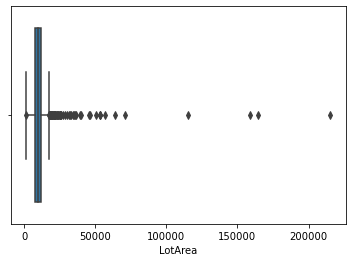

In [32]:
# Checking for outliers in 'LotArea' column
sns.boxplot(df.LotArea)
plt.xlabel("LotArea")
plt.show()

In [33]:
# removing the rows where 'LotArea' is greater than 100000

df = df[~(df.LotArea > 100000)]

In [34]:
df.shape

(1455, 76)

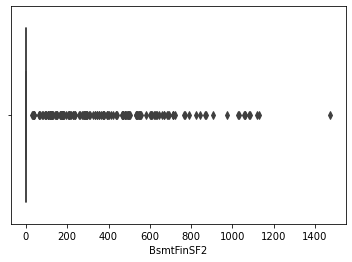

In [35]:
# Checking for outliers in 'BsmtFinSF2' column

sns.boxplot(df.BsmtFinSF2)
plt.xlabel('BsmtFinSF2')
plt.show()

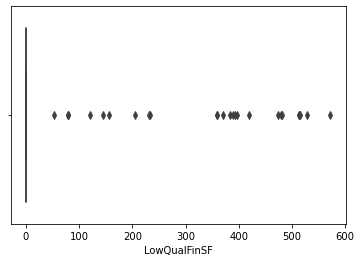

In [36]:
# Checking for outliers in 'LowQualFinSF' column

sns.boxplot(df.LowQualFinSF)
plt.xlabel('LowQualFinSF')
plt.show()

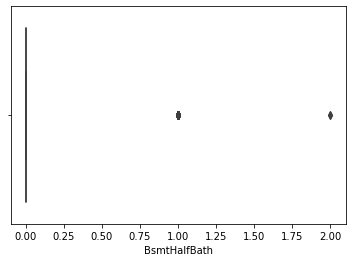

In [37]:
# Checking for outliers in 'BsmtHalfBath' column

sns.boxplot(df.BsmtHalfBath)
plt.xlabel('BsmtHalfBath')
plt.show()

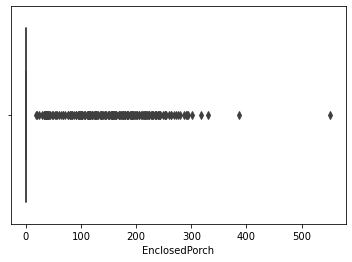

In [38]:
# Checking for outliers in 'EnclosedPorch' column

sns.boxplot(df.EnclosedPorch)
plt.xlabel('EnclosedPorch')
plt.show()

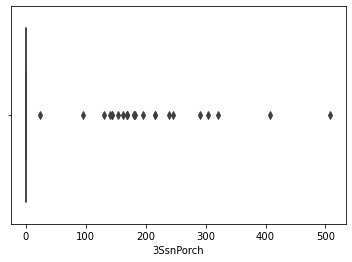

In [39]:
# Checking for outliers in '3SsnPorch' column

sns.boxplot(df['3SsnPorch'])
plt.xlabel('3SsnPorch')
plt.show()

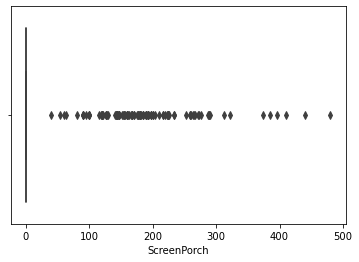

In [40]:
# Checking for outliers in 'ScreenPorch' column

sns.boxplot(df.ScreenPorch)
plt.xlabel('ScreenPorch')
plt.show()

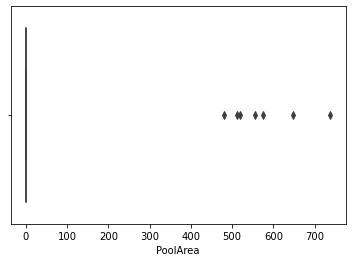

In [41]:
# Checking for outliers in 'PoolArea' column

sns.boxplot(df.PoolArea)
plt.xlabel("PoolArea")
plt.show()

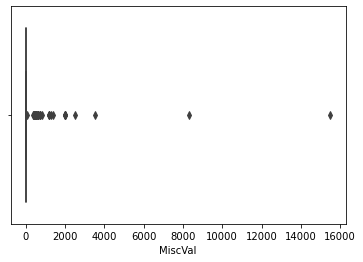

In [42]:
# Checking for outliers in 'MiscVal' column

sns.boxplot(df.MiscVal)
plt.xlabel("MiscVal")
plt.show()

As seen from the statistics summary and also from the above box plots, we can infer that these variables have lot of zeroes as the values. As such, these variables are of no use. We will rather drop these variables.

In [43]:
df.drop(['BsmtFinSF2',
         'LowQualFinSF',
         'BsmtHalfBath',
         'EnclosedPorch',
         '3SsnPorch',
         'ScreenPorch',
         'PoolArea',
         'MiscVal'], axis=1, inplace=True)

In [44]:
df.shape

(1455, 68)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1455 non-null   object 
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1455 non-null   float64
 3   LotArea        1455 non-null   int64  
 4   Street         1455 non-null   object 
 5   LotShape       1455 non-null   object 
 6   LandContour    1455 non-null   object 
 7   Utilities      1455 non-null   object 
 8   LotConfig      1455 non-null   object 
 9   LandSlope      1455 non-null   object 
 10  Neighborhood   1455 non-null   object 
 11  Condition1     1455 non-null   object 
 12  Condition2     1455 non-null   object 
 13  BldgType       1455 non-null   object 
 14  HouseStyle     1455 non-null   object 
 15  OverallQual    1455 non-null   object 
 16  OverallCond    1455 non-null   object 
 17  YearRemodAdd   1455 non-null   int64  
 18  RoofStyl

## c) Data Analysis & Visualisation

## Univariate Analysis

In [46]:
# Creating a function 'create_distplot' since we will keep needing to create plots under univariate analysis
# So in order to avoid repetitive code writing, we will create this function here.

def create_distplot(x, x_label, y, palette_color):
    plt.figure(figsize=[8,5])
    sns.set_style("dark")
    sns.distplot(df[x], bins=25, color=palette_color)
    plt.title(y, fontsize=15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel("Density",fontsize=14)
    plt.show()

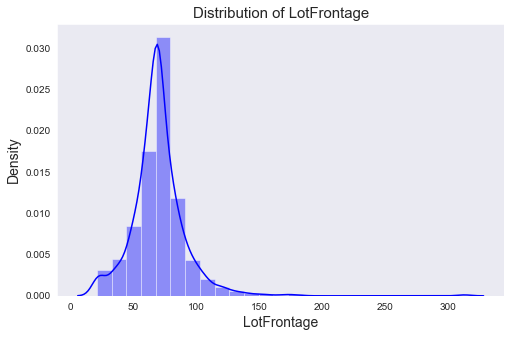

In [47]:
# analysing 'LotFrontage' column

create_distplot('LotFrontage', 'LotFrontage', 'Distribution of LotFrontage', 'b')

#### From the above plot, we can infer that the highest frequency of linear feet of street is for around 70-80

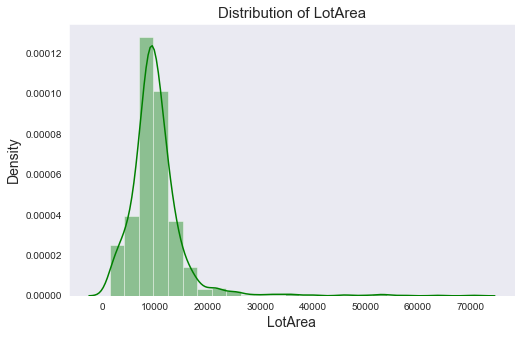

In [48]:
# analysing 'LotArea' column

create_distplot('LotArea', 'LotArea', 'Distribution of LotArea', 'g')

#### Most of the properties have a lot area of around 9000 - 12000 square feet

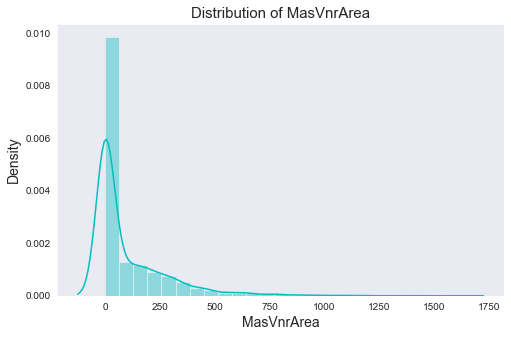

In [49]:
# analysing 'MasVnrArea' column

create_distplot('MasVnrArea', 'MasVnrArea', 'Distribution of MasVnrArea', 'c')

#### From the above plot, we can infer that most of the houses have 0 square feet of masonry veneer area meaning the absence of it.

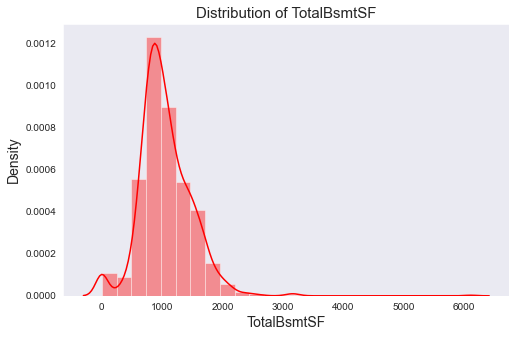

In [50]:
# analysing 'TotalBsmtSF' column

create_distplot('TotalBsmtSF', 'TotalBsmtSF', 'Distribution of TotalBsmtSF', 'r')

#### Most of the houses have total square feet of basement area equal to around 900 to 1200.

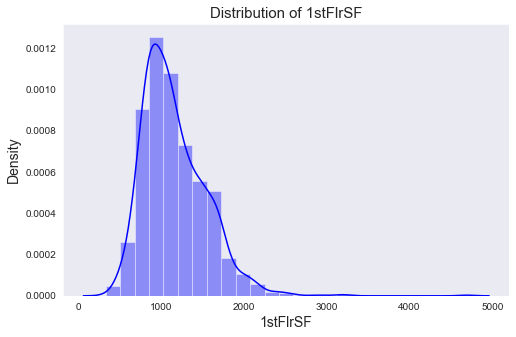

In [51]:
# analysing '1stFlrSF' column

create_distplot('1stFlrSF', '1stFlrSF', 'Distribution of 1stFlrSF', 'b')

#### Most of the houses have first floor area equal to 1000 square feet approx.

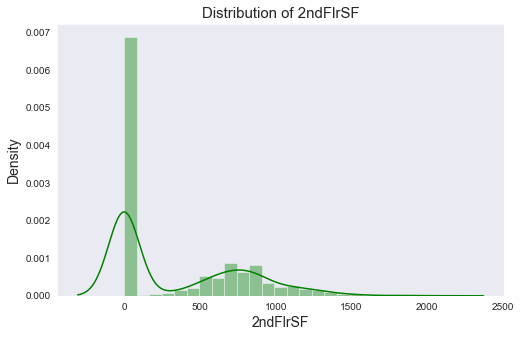

In [52]:
# analysing '2ndFlrSF' column

create_distplot('2ndFlrSF', '2ndFlrSF', 'Distribution of 2ndFlrSF', 'g')

#### Most of the houses have second floor area equal to 0 i.e., they do not have second floor at all.

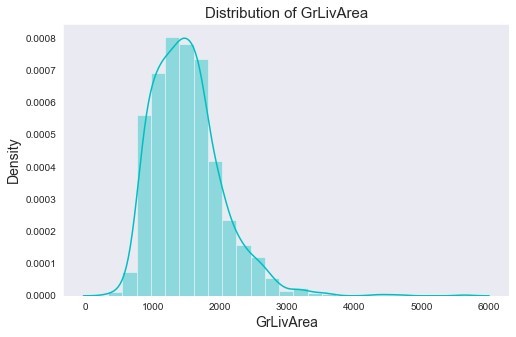

In [53]:
# analysing 'GrLivArea' column

create_distplot('GrLivArea', 'GrLivArea', 'Distribution of GrLivArea', 'c')

#### Most of the houses have living area of around 1000 to 2000 square feet.

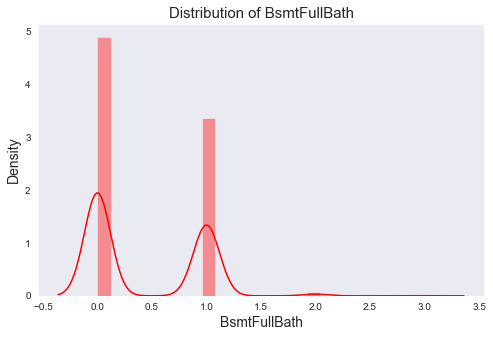

In [54]:
# analysing 'BsmtFullBath' column

create_distplot('BsmtFullBath', 'BsmtFullBath', 'Distribution of BsmtFullBath', 'r')

#### Most of the houses do not have basement full bathrooms.

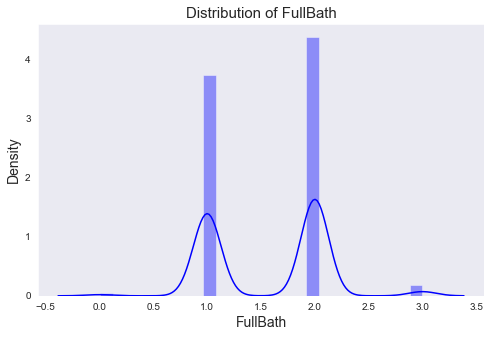

In [55]:
# analysing 'FullBath' column

create_distplot('FullBath', 'FullBath', 'Distribution of FullBath', 'b')

#### Most of the houses have 02 full bathrooms above grade.

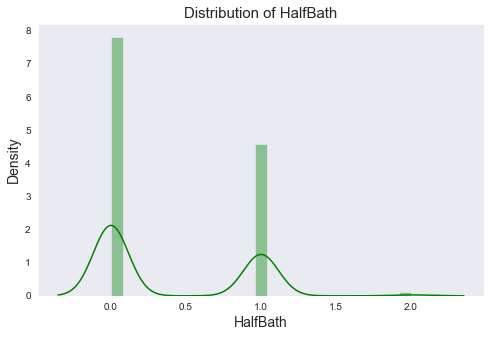

In [56]:
# analysing 'HalfBath' column

create_distplot('HalfBath', 'HalfBath', 'Distribution of HalfBath', 'g')

#### Most of the houses do not have half bathrooms above grade.

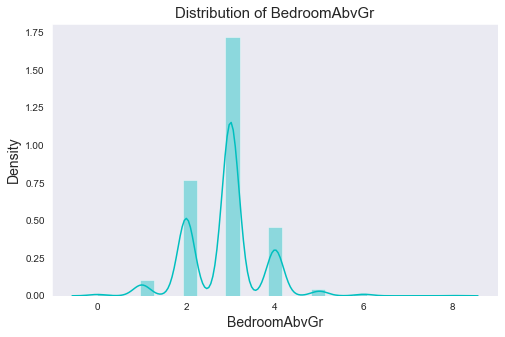

In [57]:
# analysing 'BedroomAbvGr' column

create_distplot('BedroomAbvGr', 'BedroomAbvGr', 'Distribution of BedroomAbvGr', 'c')

#### Most of the houses have 03 bedrooms above grade.

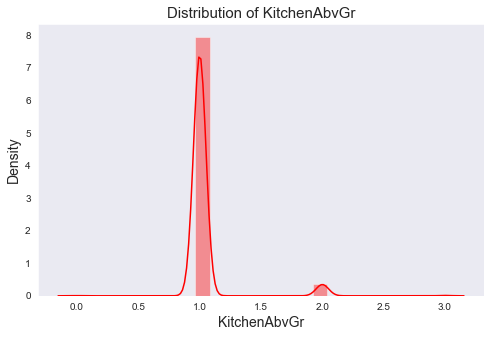

In [58]:
# analysing 'KitchenAbvGr' column

create_distplot('KitchenAbvGr', 'KitchenAbvGr', 'Distribution of KitchenAbvGr', 'r')

#### Most of the houses have 01 kitchen above grade.

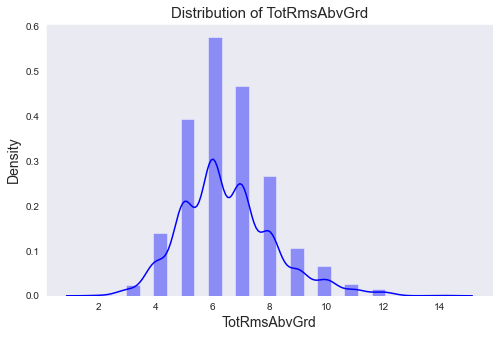

In [59]:
# analysing 'TotRmsAbvGrd' column

create_distplot('TotRmsAbvGrd', 'TotRmsAbvGrd', 'Distribution of TotRmsAbvGrd', 'b')

#### Most of the houses have 6 rooms above grade, then comes 7 and then 5.

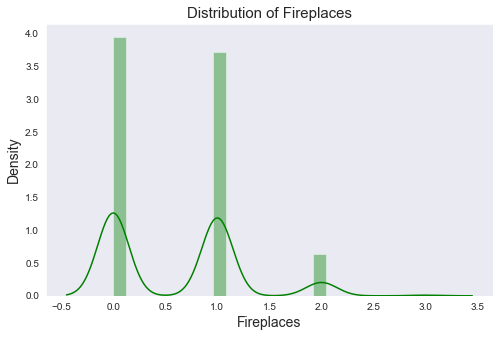

In [60]:
# analysing 'Fireplaces' column

create_distplot('Fireplaces', 'Fireplaces', 'Distribution of Fireplaces', 'g')

#### Most of the houses do not have any fireplace.

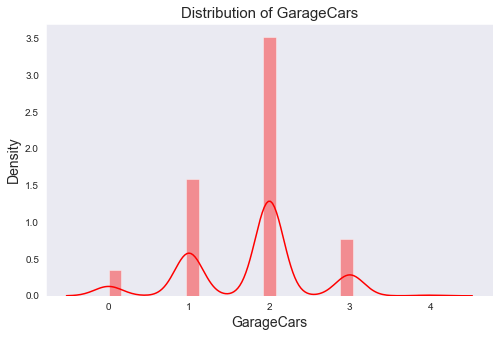

In [61]:
# analysing 'GarageCars' column

create_distplot('GarageCars', 'GarageCars', 'Distribution of GarageCars', 'r')

#### Most of the houses have garages with capacity of 02 cars.

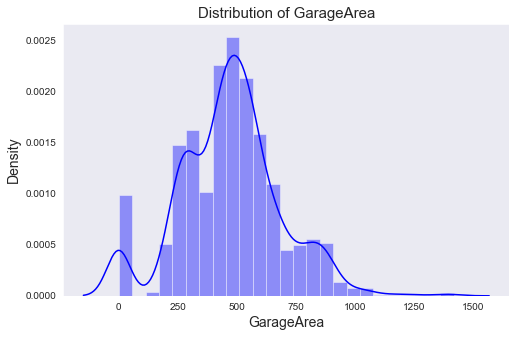

In [62]:
# analysing 'GarageArea' column

create_distplot('GarageArea', 'GarageArea', 'Distribution of GarageArea', 'b')

#### Most of the houses have garage area between 400 and 600 square feet.

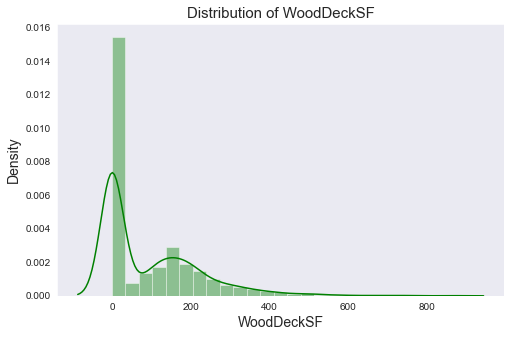

In [63]:
# analysing 'WoodDeckSF' column

create_distplot('WoodDeckSF', 'WoodDeckSF', 'Distribution of WoodDeckSF', 'g')

#### Most of the houses do not have any wood deck.

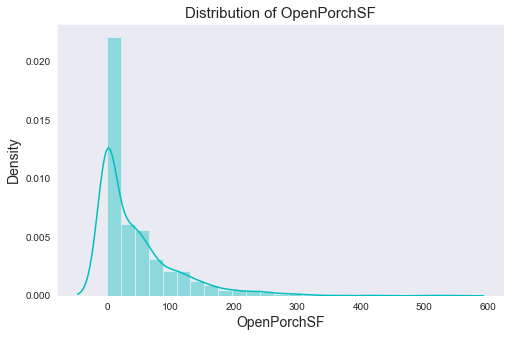

In [64]:
# analysing 'OpenPorchSF' column

create_distplot('OpenPorchSF', 'OpenPorchSF', 'Distribution of OpenPorchSF', 'c')

#### Most of the houses do not have any open porch.

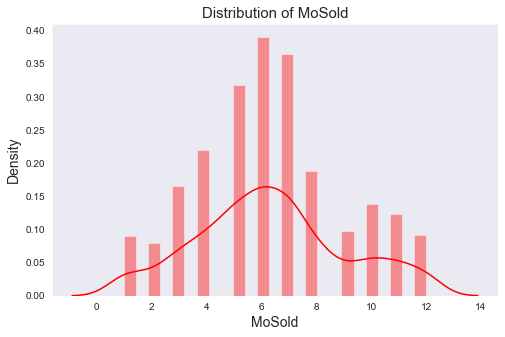

In [65]:
# analysing 'MoSold' column

create_distplot('MoSold', 'MoSold', 'Distribution of MoSold', 'r')

#### Most of the houses are sold during the month of June.

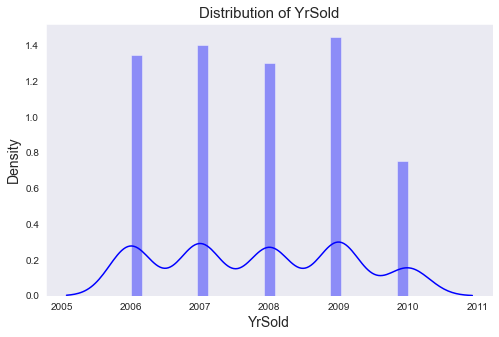

In [66]:
# analysing 'YrSold' column

create_distplot('YrSold', 'YrSold', 'Distribution of YrSold', 'b')

#### Most of the houses were sold in 2009 and after that there was a drop in houses sale in 2010.

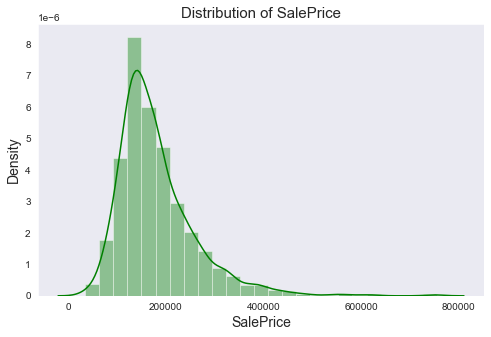

In [67]:
# analysing 'SalePrice' column

create_distplot('SalePrice', 'SalePrice', 'Distribution of SalePrice', 'g')

#### Most of the houses were sold at a price of around 150000 Australian Dollars.

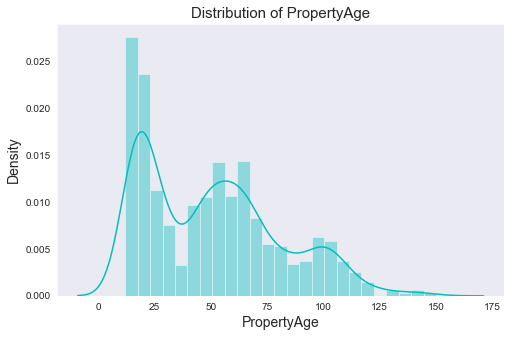

In [68]:
# analysing 'PropertyAge' column

create_distplot('PropertyAge', 'PropertyAge', 'Distribution of PropertyAge', 'c')

#### Most of the houses that were sold were new (property age of around 10-15 years).

## Bivariate Analysis

### Analysing the categorical variables

In [69]:
# Creating a function 'create_bar' since we will keep needing to create plots to analyse the categorical variables.
# So in order to avoid repetitive code writing, we will create this function here.

def create_bar(a, a_label, rot):
    
    # this function takes in 02 variables:
    # a = the variable to be analysed (string)
    # a_label = label description (string)
    # rot = rotation of xticks (either 0 or 90)
    
    plt.figure(figsize=[8,5])
    sns.barplot(data=df, x=a, y='SalePrice')
    plt.xlabel(a_label,fontsize=14)
    plt.ylabel("Sale Price",fontsize=14)
    plt.xticks(rotation=rot)
    plt.show()

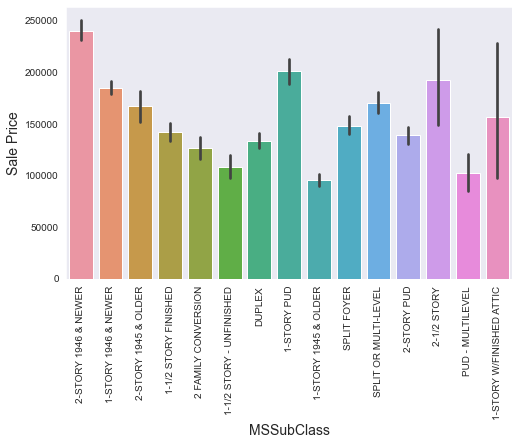

In [70]:
# Creating a bar plot between the 'MSSubClass' and 'SalePrice'

create_bar('MSSubClass', 'MSSubClass', 90)

#### '2-Story 1946 & Newer' class has the highest sales out of all the other categories.

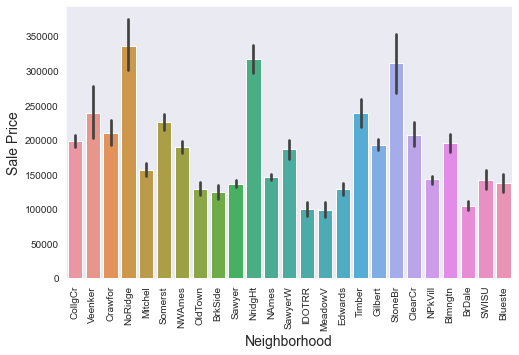

In [71]:
# Creating a bar plot between the 'Neighborhood' and 'SalePrice'

create_bar('Neighborhood', 'Neighborhood', 90)

#### In the above plot, it can be inferred that the houses with 'NoRidge' neighbourhood has the highest sale price.

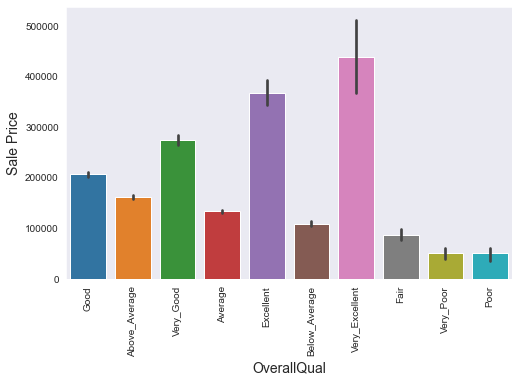

In [72]:
# Creating a bar plot between the 'OverallQual' and 'SalePrice'

create_bar('OverallQual', 'OverallQual', 90)

#### Houses with 'Very Excellent' overall quality have the highest sales price.

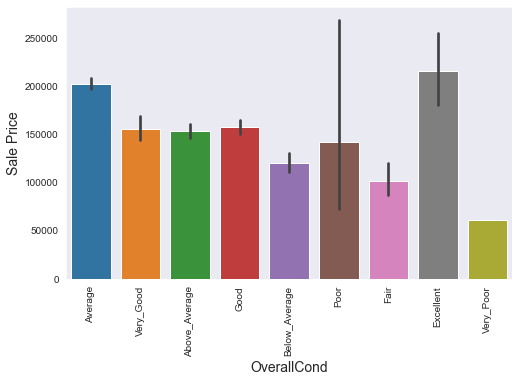

In [73]:
# Creating a bar plot between the 'OverallCond' and 'SalePrice'

create_bar('OverallCond', 'OverallCond', 90)

#### Houses with 'Excellent' overall condition have the highest sales price.

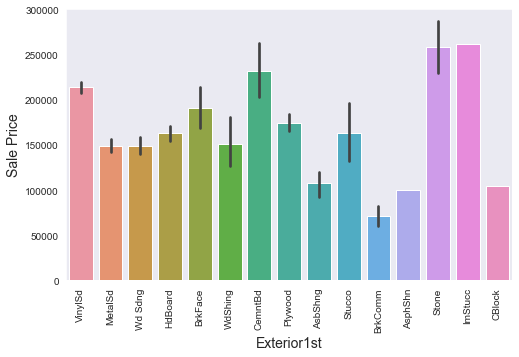

In [74]:
# Creating a bar plot between the 'Exterior1st' and 'SalePrice'

create_bar('Exterior1st', 'Exterior1st', 90)

#### Houses with exterior covering as 'Imitation Stucco' have the highest sale price.

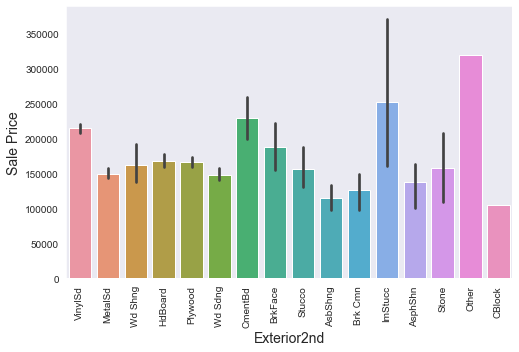

In [75]:
# Creating a bar plot between the 'Exterior2nd' and 'SalePrice'

create_bar('Exterior2nd', 'Exterior2nd', 90)

#### Houses with second exterior material as 'Other' have the highest prices.

In [76]:
var_list = ['MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl',
       'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

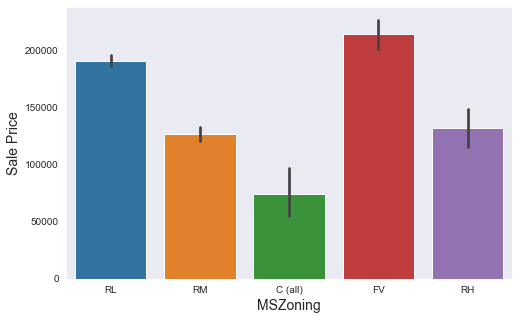

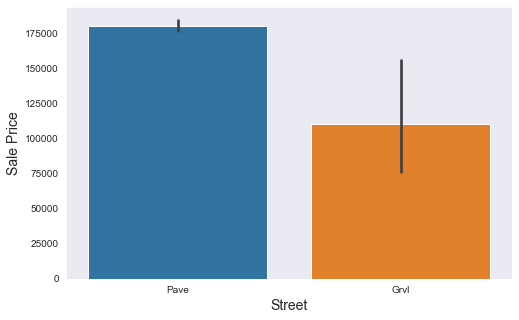

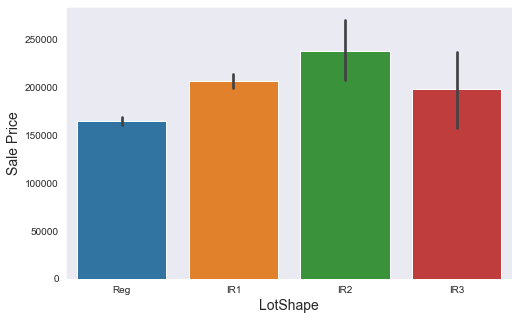

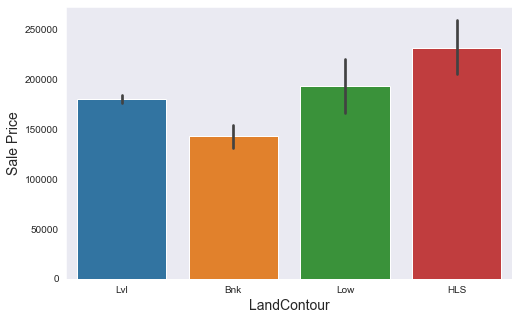

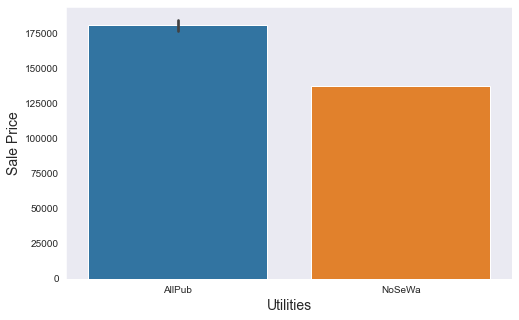

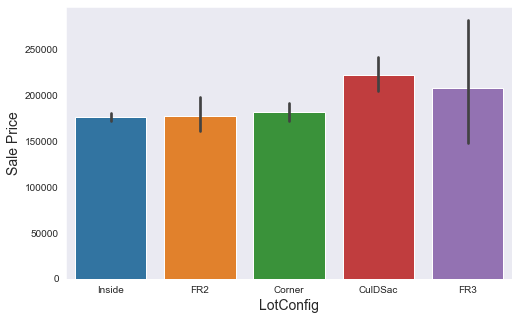

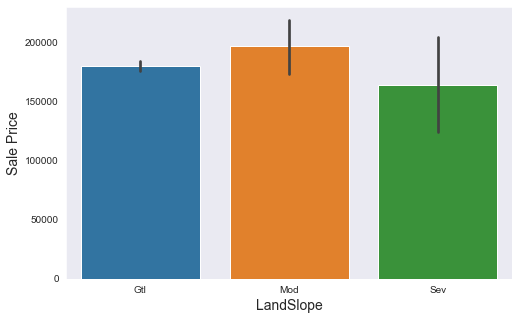

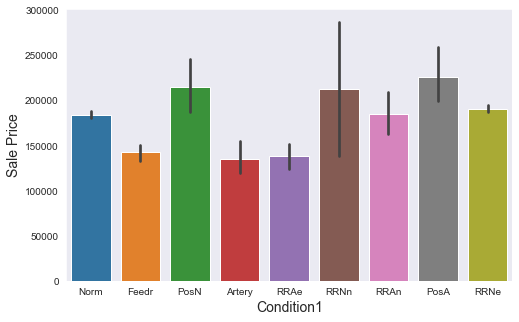

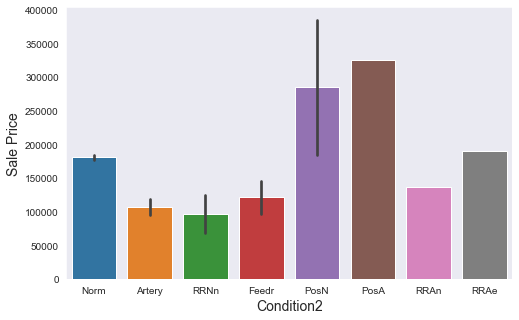

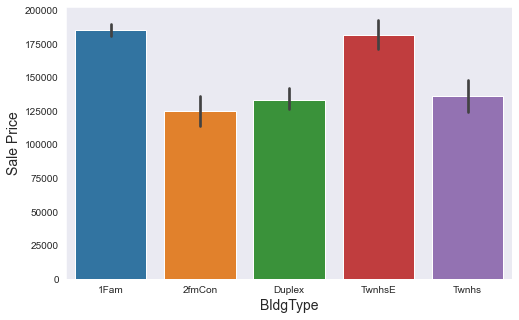

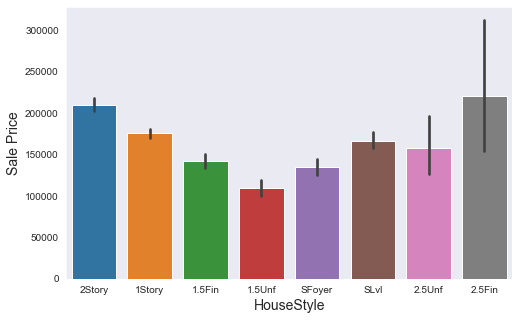

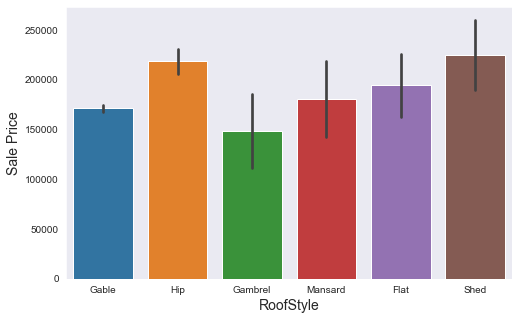

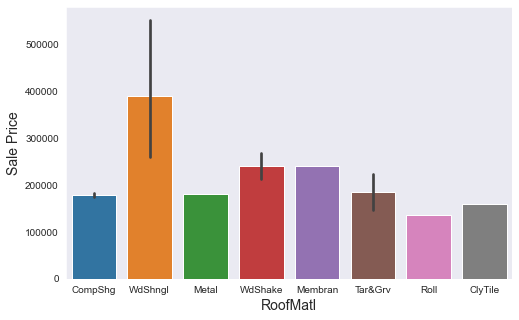

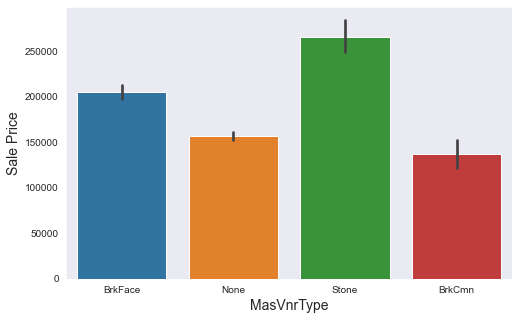

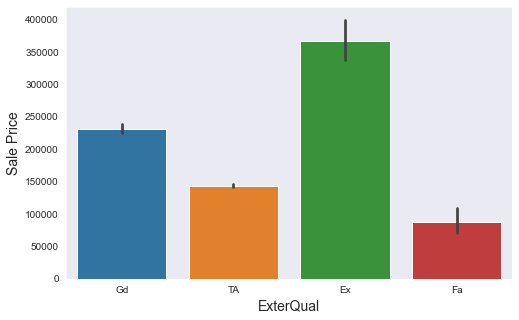

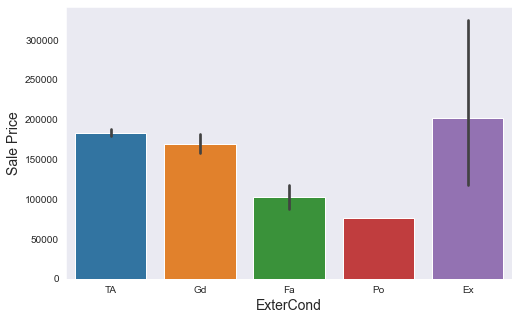

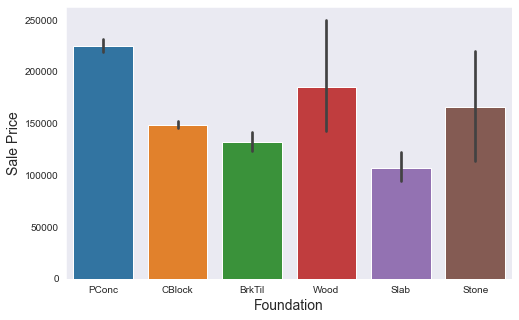

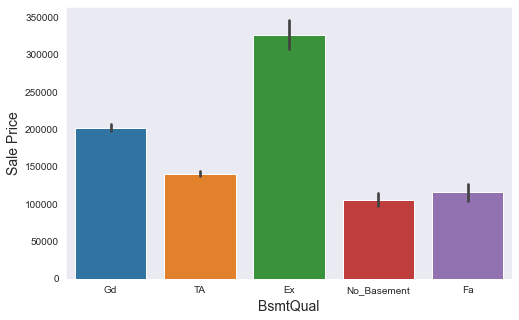

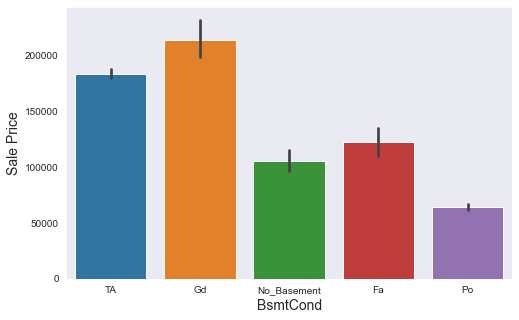

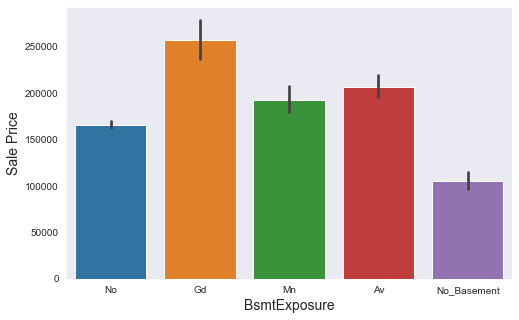

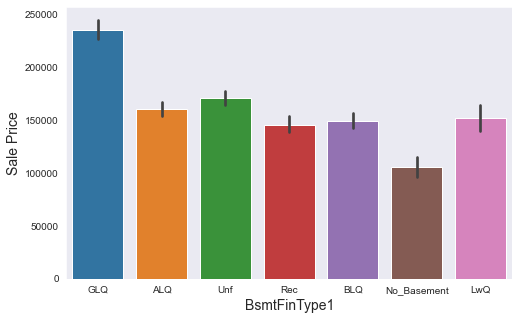

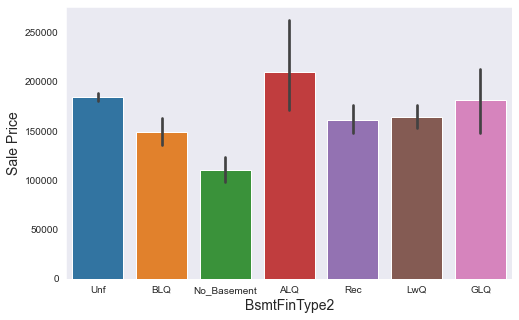

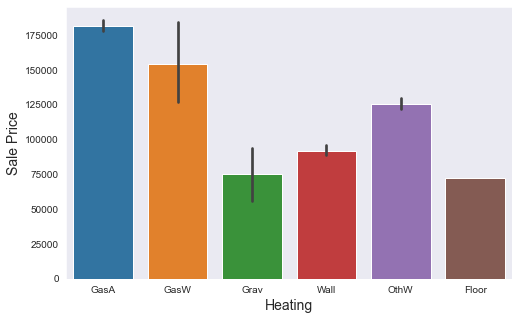

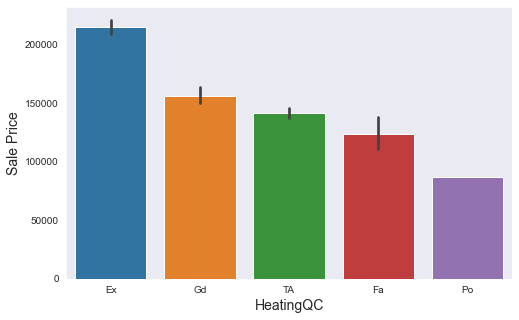

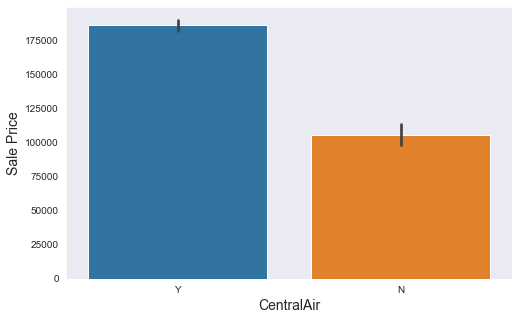

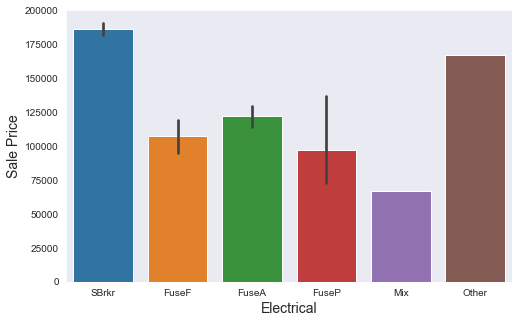

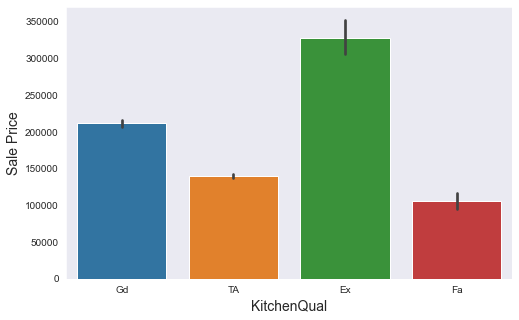

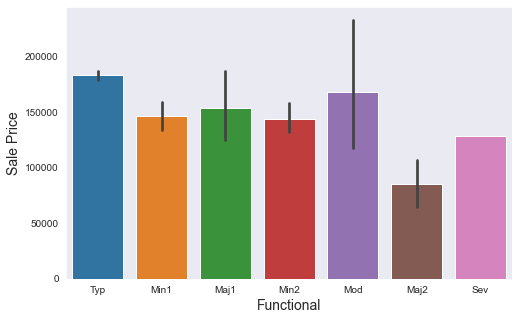

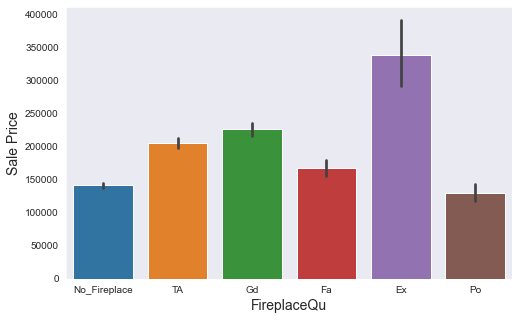

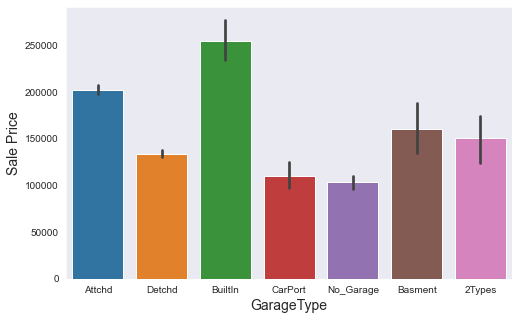

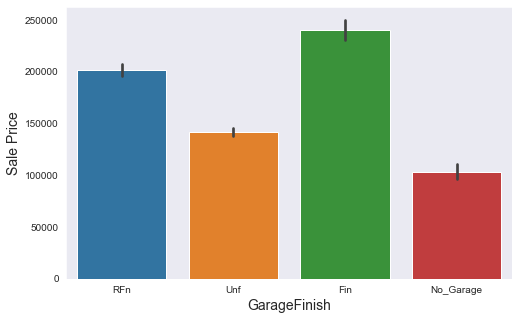

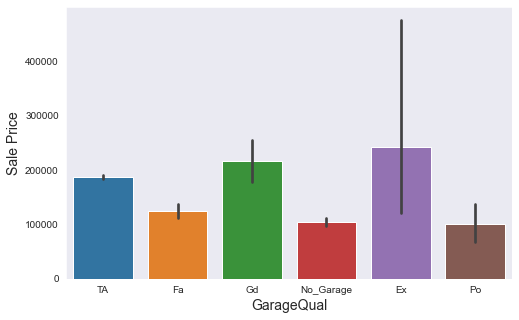

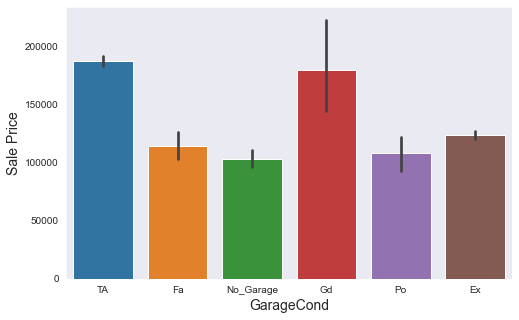

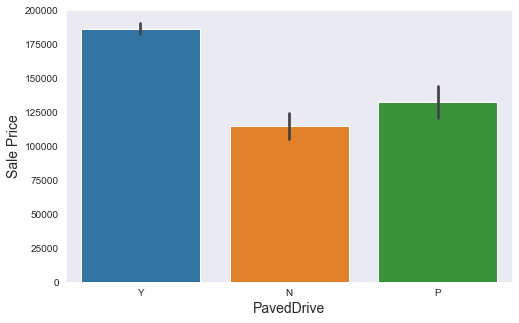

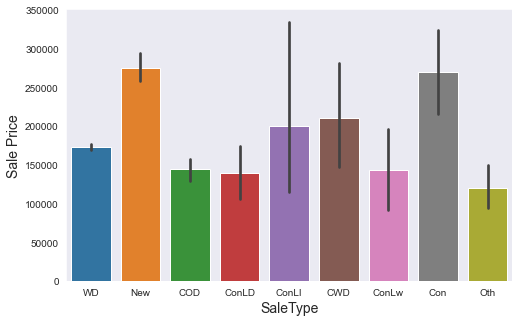

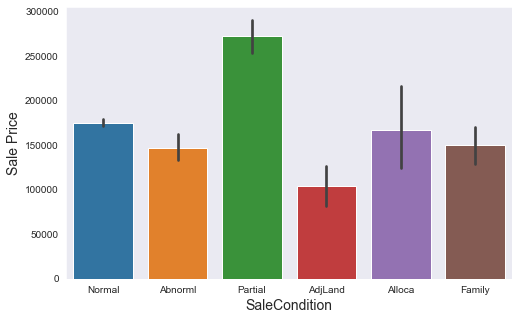

In [77]:
for i in var_list:
    create_bar(i, i, 0)

#### From the above plots, we can infer the below:

MSZoning - Houses with 'Floating Village Residential' has the highest sale price.<br>
Street - Houses with paved street have the highest sales price.<br>
LotShape - Moderately irregular shaped houses have the highest sales price.<br>
LandContour - Houses on Hillside have the highest sales price.<br>
Utilities - Houses that have all the utilities (including electricity, gas, water etc.) are sold at high rates.<br>
LotConfig - Houses with configuration as 'Cul-de-sac' have the highest sales price.<br>
LandSlope - Houses with moderate slope have the highest sales price.<br>
Condition1 - Houses which are Adjacent to postive off-site feature have the highest sales price.<br>
Condition2 - Houses which are Adjacent to postive off-site feature have the highest sales price.<br>
BldgType - Houses with building type as 'Single-family Detached' have the highest sales price.<br>
HouseStyle - Houses with Two and one-half story: 2nd level finished have the highest sales price.<br>
RoofStyle - Houses with roof style as 'Shed' have the highest sales price.<br>
RoofMatl - Houses with roof material as 'Wood Shingles' have the highest sales price.<br>
MasVnrType - Houses with stone Masonry veneer type have the highest sales price.<br>
ExterQual - Houses with 'Excellent' external material quality have the highest sales price.<br>
ExterCond - Houses with 'Excellent' external material condition have the highest sales price.<br>
Foundation - Houses with 'Poured Contrete' foundation have the highest sales price.<br>
BsmtQual - Houses with 'Excellent' garage quality have the highest sales price.<br>
BsmtCond - Houses with basements having good condition have the highest sales price.<br>
BsmtExposure - Houses with basement having good exposure to  walkout or garden level walls have the highest sales price.<br>
BsmtFinType1 - Houses with basement finished area rated as 'Good Living Quarters' have the highest sales price.<br>
BsmtFinType2 - Houses with basement finished area rated as 'Average Living Quarters' have the highest sales price.<br>
Heating - Houses with heating type as 'Gas forced warm air furnace' have the highest sales price.<br>
HeatingQC - Houses with 'Excellent' heating quality have the highest sales price.<br>
CentralAir - Houses with central air conditioning system have the highest sales price.<br>
Electrical - Houses with Standard Circuit Breakers & Romex have the highest sales price.<br>
KitchenQual - Houses with 'Excellent' kitchen quality have the highest sales price.<br>
Functional - Houses with typical functionality have the highest sales price.<br>
FireplaceQu - Houses with 'Excellent' fireplace quality have the highest sales price.<br>
GarageType - Houses with built in garage have the highest sales price.<br>
GarageFinish - Houses with completely finished garage have the highest sales price.<br>
GarageQual - Houses with 'Excellent' garage quality have the highest sales price.<br>
GarageCond - Houses with 'Excellent' garage condition have the highest sales price.<br>
PavedDrive - Houses with completely paved driveways have the highest sales price.<br>
SaleType - Home just constructed and sold and on Contract 15% Down payment regular terms have the highest sales price.<br>
SaleCondition - Partially completed houses have the highest sales price.<br>

### Analysing the continuous variables

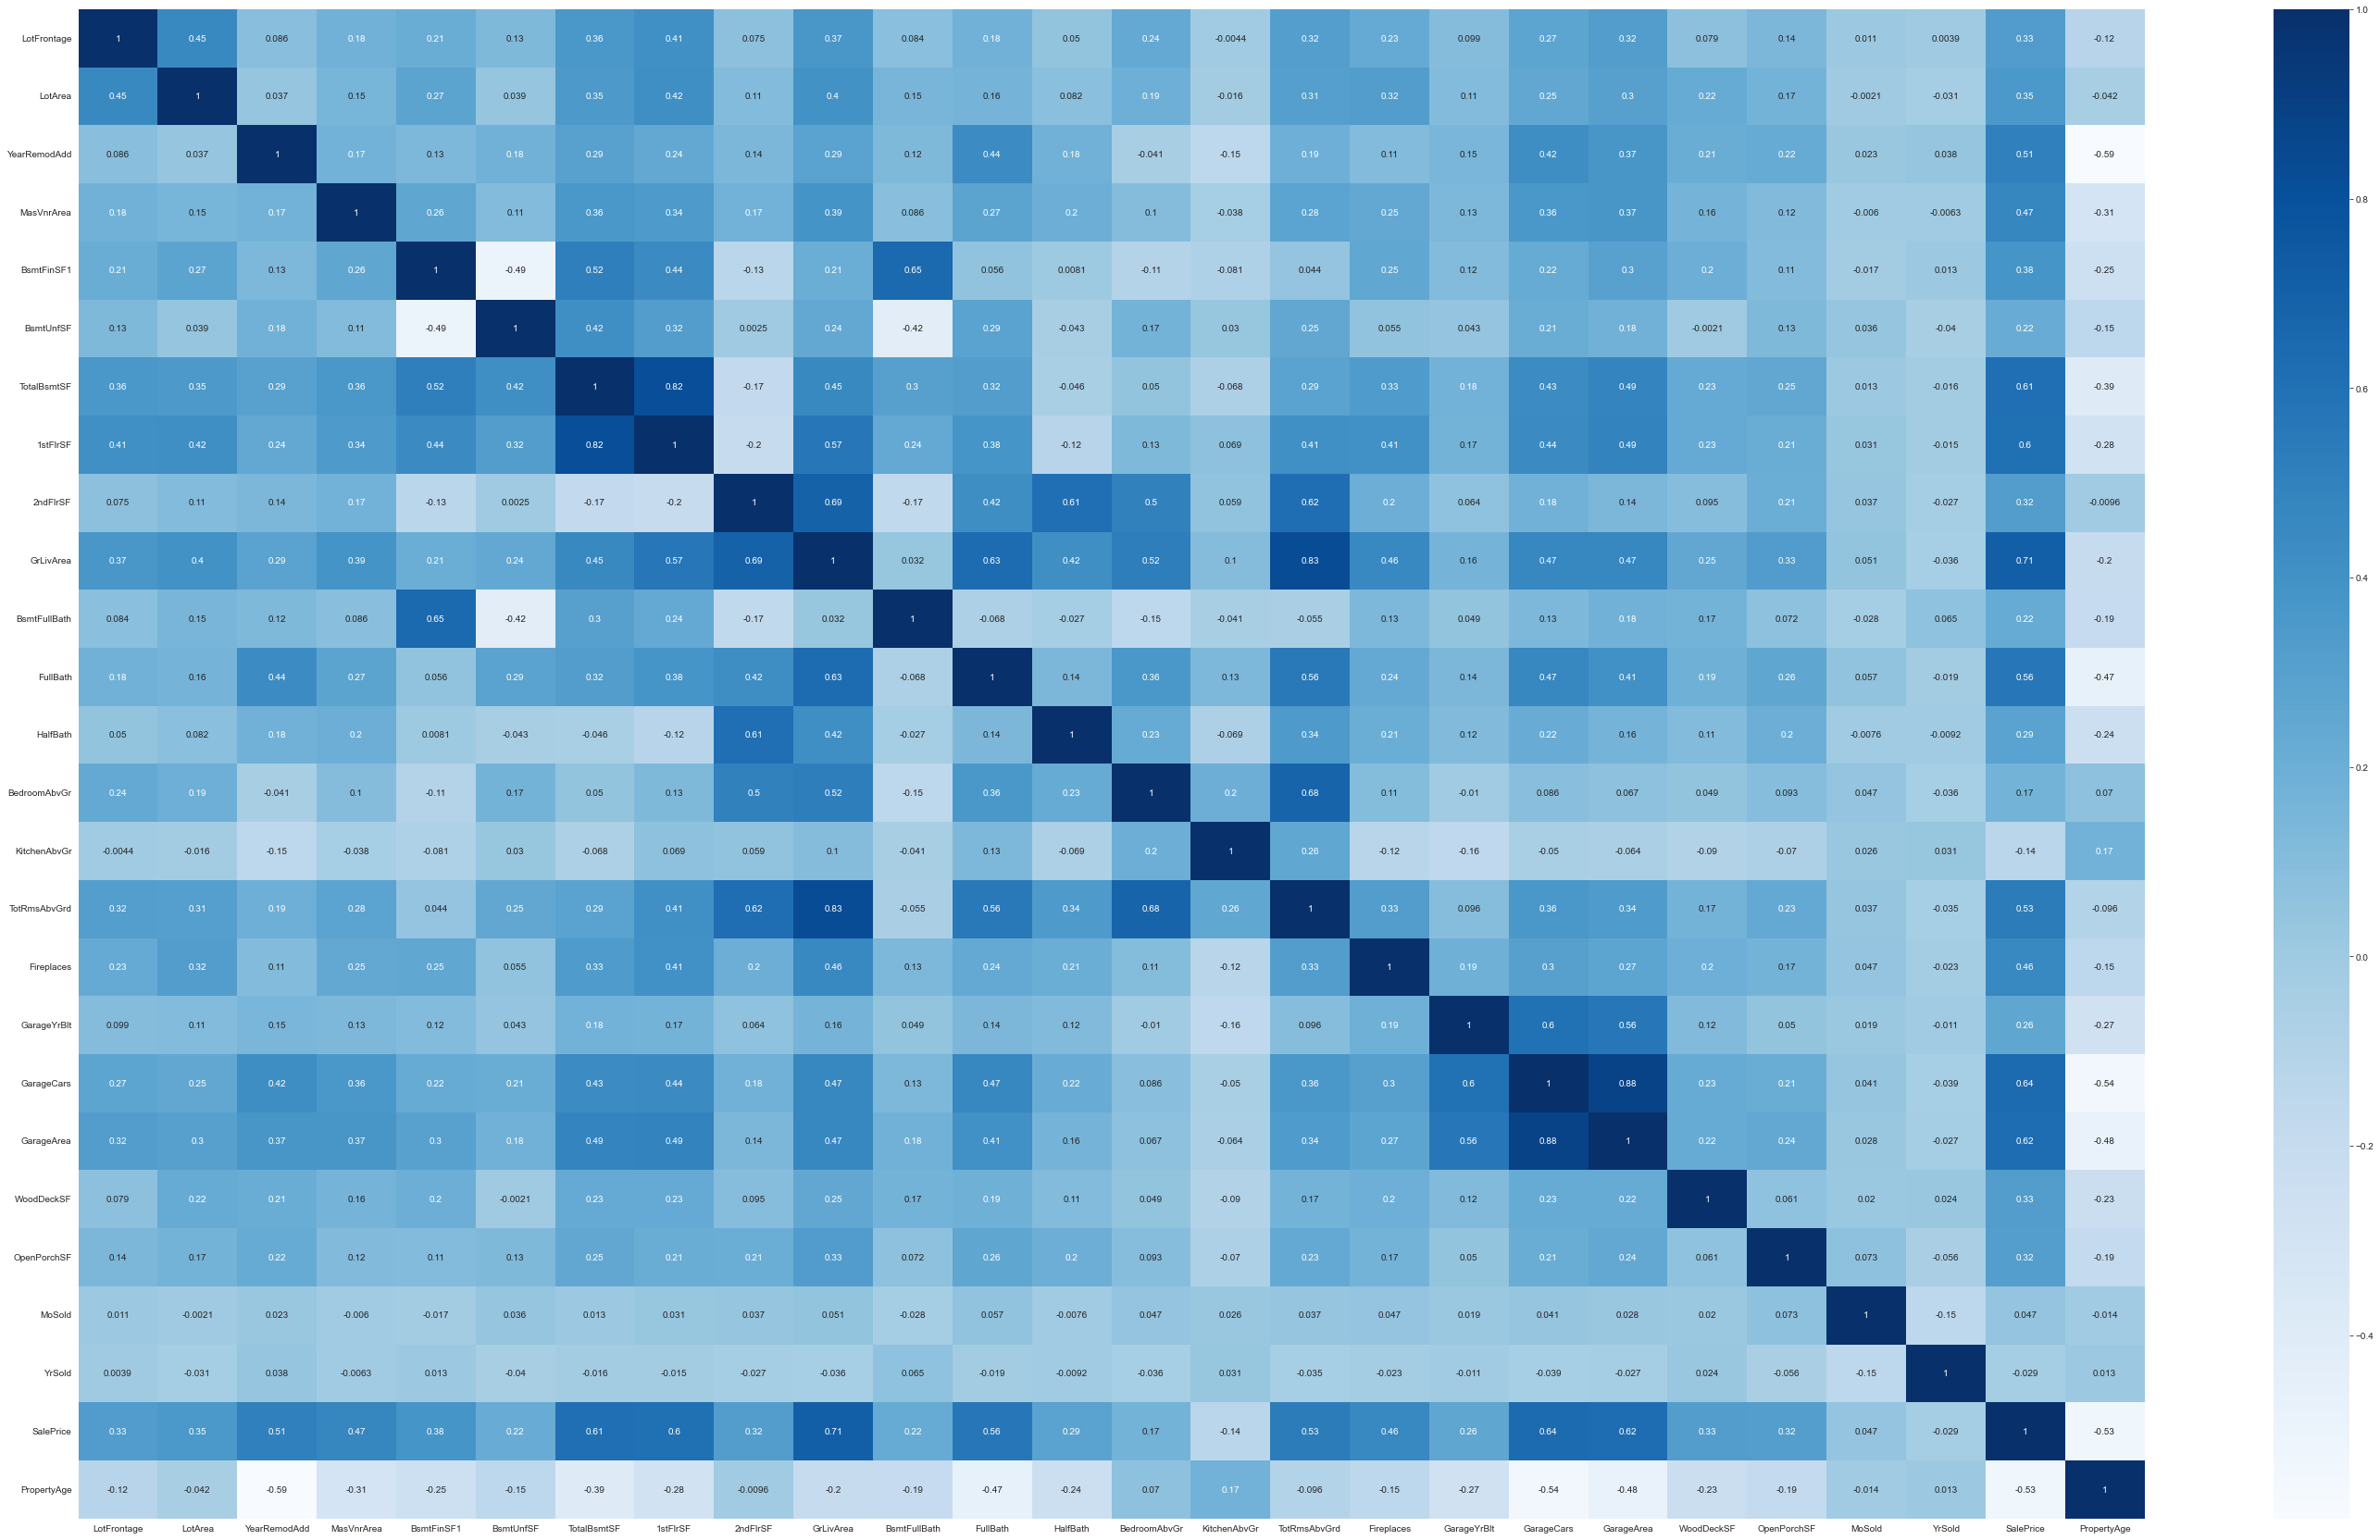

In [78]:
# creating heatmap for the continuous variables to check for correlation

plt.figure(figsize=[50,30])
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

#### From the above heatmap, we can infer that the below variables have the highest correlations with Sales price,

YearRemodAdd<br>
TotalBsmtSF<br>
1stFlrSF<br>
GrLivArea<br>
FullBath<br>
TotalRmsAbvGrd<br>
GarageCars<br>
GarageArea<br>
PropertyAge<br>

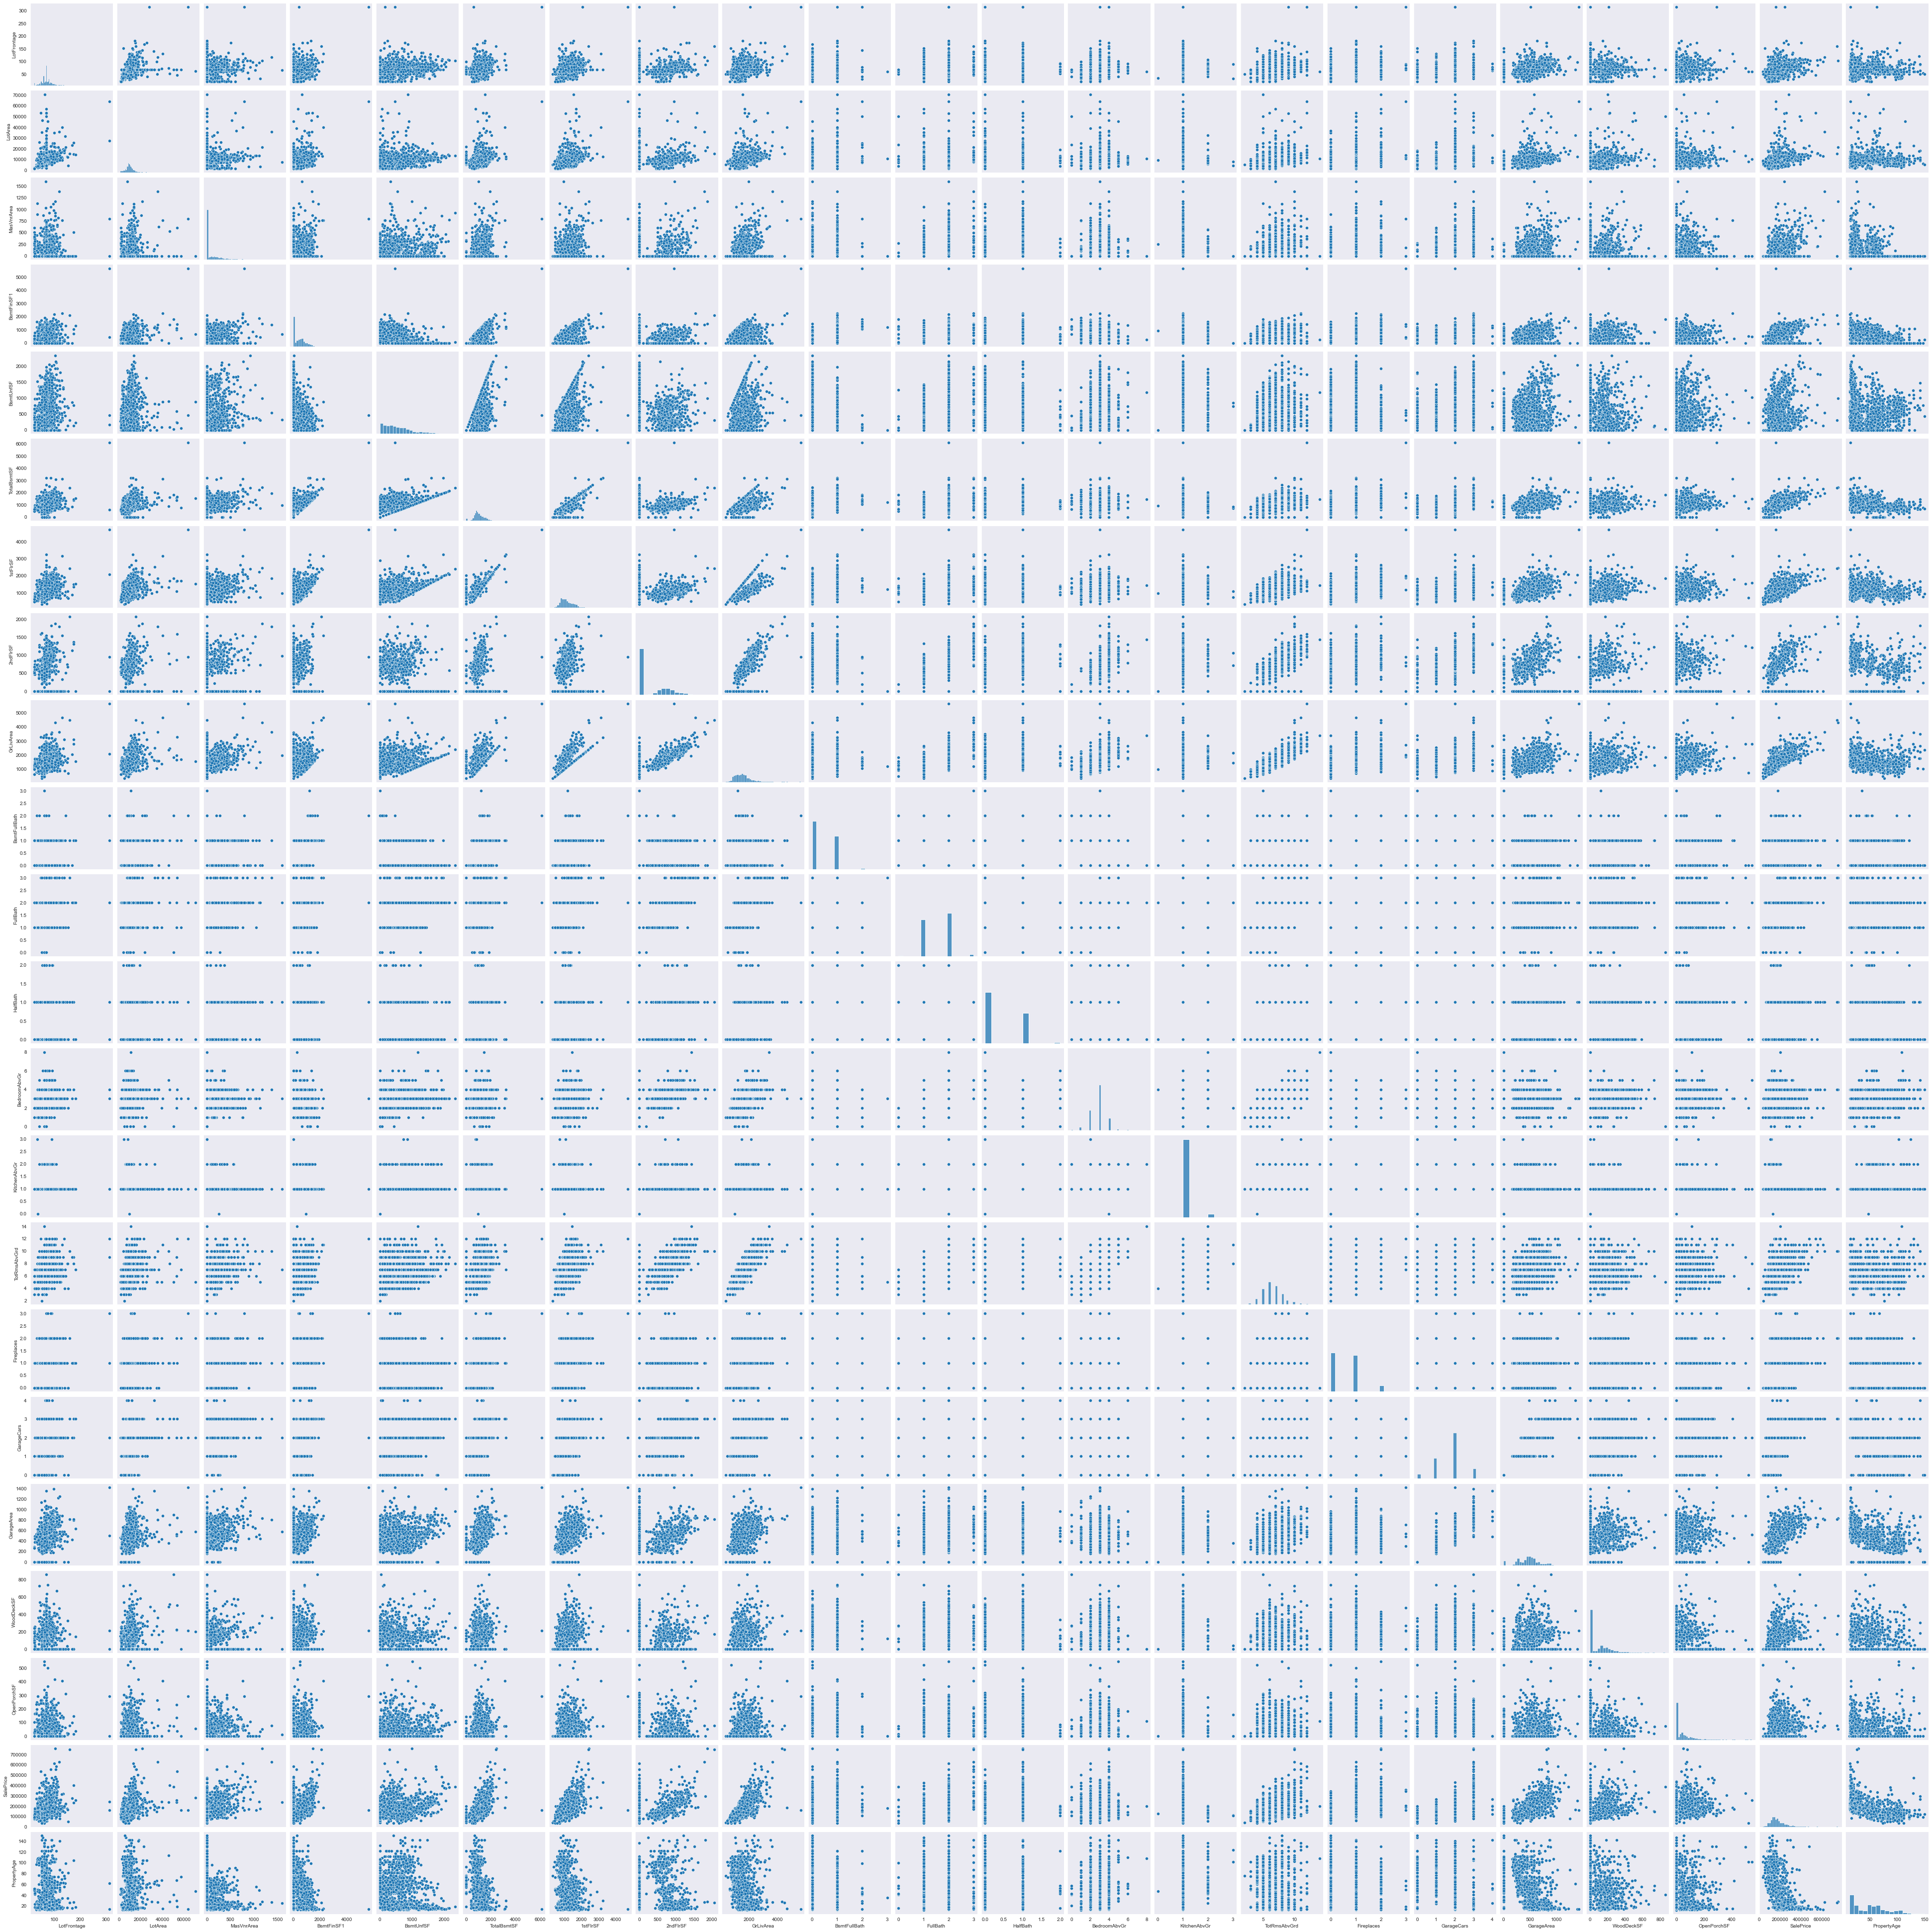

In [79]:
# creating scatter plots between all the continuous variables using pairplot

sns.pairplot(df, vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
        'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice', 'PropertyAge'])
plt.show()

# 3. Data Preparation

#### Steps:
- Encoding (Creating dummy variables)
- Train Test Split
- Feature Rescaling
- Create X and y

In [80]:
# importing the datset

df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     2-STORY 1946 & NEWER       RL         65.0     8450   Pave      Reg   
1     1-STORY 1946 & NEWER       RL         80.0     9600   Pave      Reg   
2     2-STORY 1946 & NEWER       RL         68.0    11250   Pave      IR1   
3     2-STORY 1945 & OLDER       RL         60.0     9550   Pave      IR1   
4     2-STORY 1946 & NEWER       RL         84.0    14260   Pave      IR1   
...                    ...      ...          ...      ...    ...      ...   
1455  2-STORY 1946 & NEWER       RL         62.0     7917   Pave      Reg   
1456  1-STORY 1946 & NEWER       RL         85.0    13175   Pave      Reg   
1457  2-STORY 1945 & OLDER       RL         66.0     9042   Pave      Reg   
1458  1-STORY 1946 & NEWER       RL         68.0     9717   Pave      Reg   
1459  1-STORY 1946 & NEWER       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle    OverallQual    OverallCond  \
0          Norm     1Fam     2Story           Good        Average   
1          Norm     1Fam     1Story  Above_Average      Very_Good   
2          Norm     1Fam     2Story           Good        Average   
3          Norm     1Fam     2Story           Good        Average   
4          Norm     1Fam     2Story      Very_Good        Average   
...         ...      ...        ...            ...            ...   
1455       Norm     1Fam     2Story  Above_Average        Average   
1456       Norm     1Fam     1Story  Above_Average  Above_Average   
1457       Norm     1Fam     2Story           Good      Excellent   
1458       Norm     1Fam     1Story        Average  Above_Average   
1459       Norm     1Fam     1Story        Average  Above_Average   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   
...          ...       ...       ...        ..

## a) Encoding of Data

- __Converting Binary Variables into 0 & 1__ - These variables are 'Street', 'CentralAir'.
- __Creating dummy variables for categorical variables other than binary variables__ -  These variables are:

    ['MSSubClass', 'MSZoning','LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1','Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond','RoofStyle', 'RoofMatl','Exterior1st','Exterior2nd','MasVnrType', 'ExterQual','ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical','KitchenQual', 'Functional','FireplaceQu', 'GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType','SaleCondition']

    In the following lines, we will create dummy for each of these variables.

In [81]:
cat_var = ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'Utilities',
           'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1','Condition2',
           'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond','RoofStyle',
           'RoofMatl','Exterior1st','Exterior2nd','MasVnrType', 'ExterQual',
           'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure',
           'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical',
           'KitchenQual', 'Functional','FireplaceQu', 'GarageType','GarageFinish',
           'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType','SaleCondition']

In [82]:
# converting the binary variables to 0 and 1

df['Street'] = df['Street'].map({'Grvl':0, 'Pave':1})
df['CentralAir'] = df['CentralAir'].map({'N':0, 'Y':1})

In [83]:
# using a for loop to create dummy variables for all the above mentioned categorical variables other than binary variables

for i in cat_var:
    dummy_df = pd.get_dummies(df[i], prefix = i, drop_first = True)
    df = pd.concat([df,dummy_df], axis = 1)

In [84]:
# droppping the initial categorical feature columns since now that we have created the dummy variables for them

df = df.drop(cat_var, axis = 1)

In [85]:
df

LotFrontage  LotArea  Street  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0            65.0     8450       1          2003       196.0         706   
1            80.0     9600       1          1976         0.0         978   
2            68.0    11250       1          2002       162.0         486   
3            60.0     9550       1          1970         0.0         216   
4            84.0    14260       1          2000       350.0         655   
...           ...      ...     ...           ...         ...         ...   
1455         62.0     7917       1          2000         0.0           0   
1456         85.0    13175       1          1988       119.0         790   
1457         66.0     9042       1          2006         0.0         275   
1458         68.0     9717       1          1996         0.0          49   
1459         75.0     9937       1          1965         0.0         830   

      BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  \
0           150          856           1       856       854       1710   
1           284         1262           1      1262         0       1262   
2           434          920           1       920       866       1786   
3           540          756           1       961       756       1717   
4           490         1145           1      1145      1053       2198   
...         ...          ...         ...       ...       ...        ...   
1455        953          953           1       953       694       1647   
1456        589         1542           1      2073         0       2073   
1457        877         1152           1      1188      1152       2340   
1458          0         1078           1      1078         0       1078   
1459        136         1256           1      1256         0       1256   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                1         2         1             3             1   
1                0         2         0             3             1   
2                1         2         1             3             1   
3                1         1         0             3             1   
4                1         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             1         2         0             3             1   
1457             0         2         0             4             1   
1458             1         1         0             2             1   
1459             1         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4                9           1       2000.0           3         836   
...            ...         ...          ...         ...         ...   
1455             7           1       1999.0           2         460   
1456             7           2       1978.0           2         500   
1457             9           2       1941.0           1         252   
1458             5           0       1950.0           1         240   
1459             6           0       1965.0           1         276   

      WoodDeckSF  OpenPorchSF  MoSold  YrSold  SalePrice  PropertyAge  \
0              0           61       2    2008     208500           19   
1            298            0       5    2007     181500           46   
2              0           42       9    2008     223500           21   
3              0           35       2    2006     140000          107   
4            192           84      12    2008     250000           22   
...          ...          ...     ...     ...        ...    

## b) Train-Test Split

In [86]:
# creating train_test_split with 80-20 ratio

df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 100)

## c) Feature Scaling of the Data Set

So, as mentioned by the SME during the live session and also during the video lectures, it is a good practice to perform the feature scaling before the train-test split. Hence, in the next few lines, will be performing the scaling of the data set using MinMax Scaler.

In [87]:
# Instantiating an object 'scaler'

scaler = MinMaxScaler()

In [88]:
# Creating a list of numeric variables whose scaling needs to be done

num_vars = ['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
            'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
            'BsmtFullBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
            'TotRmsAbvGrd', 'Fireplaces','GarageYrBlt', 'GarageCars', 'GarageArea',
            'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'PropertyAge']

# Fitting on train set

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [89]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

## d) Create X and y

In [90]:
# create X and y

y_train = df_train.pop('SalePrice')
X_train = df_train

In [91]:
y_test = df_test.pop('SalePrice')
X_test = df_test

# 4. Data Modelling

## Steps:
- Feature Selection using RFE method
- Building a model with the top 30 significant variables considered by RFE
- Rebuilding model by dropping insignificant variables
- Finding the best model

## Feature Selection using RFE method

In [92]:
# feature selection using Recursive Feature Elimination (RFE) method.
# We will first use RFE appraoch to select the first 30-most significant predictor variables.
# Then we will be checking further for the most significant variables through manual feature elimination.

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)
rfe = rfe.fit(X_train, y_train)

In [93]:
# checking for the columns and their ranking as per RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 86),
 ('LotArea', True, 1),
 ('Street', False, 120),
 ('YearRemodAdd', False, 115),
 ('MasVnrArea', False, 93),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 98),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 182),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', False, 174),
 ('BsmtFullBath', False, 222),
 ('FullBath', False, 143),
 ('HalfBath', False, 212),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 134),
 ('Fireplaces', False, 92),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 3),
 ('GarageArea', False, 100),
 ('WoodDeckSF', False, 107),
 ('OpenPorchSF', False, 163),
 ('MoSold', False, 161),
 ('YrSold', False, 215),
 ('PropertyAge', True, 1),
 ('MSSubClass_1-1/2 STORY FINISHED', False, 72),
 ('MSSubClass_1-STORY 1945 & OLDER', False, 71),
 ('MSSubClass_1-STORY 1946 & NEWER', False, 73),
 ('MSSubClass_1-STORY PUD', False, 80),
 ('MSSubClass_1-STORY W/FINISHED ATTIC', False, 76),
 ('MSSubClass_2 FAMI

In [94]:
# checking the columns considered by RFE

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'PropertyAge',
       'Neighborhood_Crawfor', 'Condition2_RRAe', 'OverallQual_Excellent',
       'OverallQual_Very_Excellent', 'OverallQual_Very_Good', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Foundation_Wood', 'Functional_Sev', 'GarageType_No_Garage',
       'GarageFinish_No_Garage', 'GarageQual_No_Garage',
       'GarageCond_No_Garage', 'SaleType_Con', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [95]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'Street', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF',
       'CentralAir', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       ...
       'SaleType_CWD', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=237)

## Building a model using statsmodels library

### Model - 1

In [96]:
# Creating new X_train for the columns selected through RFE

X_train_rfe = X_train[col]

# Unlike SKLearn, statsmodels library doesn't automatically fit a constant, 
# So we need to use the method sm.add_constant(X) in order to add a constant. 

X_train_01 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_01 = sm.OLS(y_train, X_train_01)
lr_model_01 = lr_01.fit()


# checking statistical summary

lr_model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     379.5
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:41   Log-Likelihood:                -13442.
No. Observations:                1164   AIC:                         2.694e+04
Df Residuals:                    1136   BIC:                         2.708e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.052e+06   1.11e+05     -9.486      0.000   -1.27e+06   -8.35e+05
LotArea                      1.05e+05   1.17e+04      8.981      0.000     8.2e+04    1.28e+05
BsmtFinSF1                  1.322e+05   1.16e+04     11.375      0.000    1.09e+05    1.55e+05
TotalBsmtSF                 1.322e+05   2.14e+04      6.178      0.000    9.02e+04    1.74e+05
1stFlrSF                    3.178e+05   1.74e+04     18.251      0.000    2.84e+05    3.52e+05
2ndFlrSF                    1.598e+05   5015.797     31.857      0.000     1.5e+05     1.7e+05
BedroomAbvGr               -4.569e+04   7385.080     -6.186      0.000   -6.02e+04   -3.12e+04
KitchenAbvGr               -8.775e+04   1.11e+04     -7.874      0.000    -1.1e+05   -6.59e+04
GarageYrBlt                 3.466e+05   1.07e+05      3.249      0.001    1.37e+05    5.56e+05
PropertyAge                -5.731e+04   6010.361     -9.535      0.000   -6.91e+04   -4.55e+04
Neighborhood_Crawfor        3.544e+04   4402.287      8.051      0.000    2.68e+04    4.41e+04
Condition2_RRAe            -9.459e+04   3.92e+04     -2.412      0.016   -1.72e+05   -1.76e+04
OverallQual_Excellent       9.547e+04   4753.317     20.085      0.000    8.61e+04    1.05e+05
OverallQual_Very_Excellent  1.401e+05   7735.747     18.110      0.000    1.25e+05    1.55e+05
OverallQual_Very_Good       3.789e+04   2774.942     13.656      0.000    3.25e+04    4.33e+04
RoofStyle_Shed              4.231e+04   2.98e+04      1.420      0.156   -1.62e+04    1.01e+05
RoofMatl_CompShg            8.162e+05   2.94e+04     27.742      0.000    7.58e+05    8.74e+05
RoofMatl_Membran             8.57e+05   3.84e+04     22.303      0.000    7.82e+05    9.32e+05
RoofMatl_Metal              8.261e+05   3.85e+04     21.458      0.000    7.51e+05    9.02e+05
RoofMatl_Tar&Grv             8.24e+05   3.09e+04     26.670      0.000    7.63e+05    8.85e+05
RoofMatl_WdShake            7.911e+05    3.3e+04     23.943      0.000    7.26e+05    8.56e+05
RoofMatl_WdShngl            7.849e+05   3.21e+04     24.485      0.000    7.22e+05    8.48e+05
Foundation_Wood              -4.4e+04   1.48e+04     -2.983      0.003   -7.29e+04   -1.51e+04
Functional_Sev             -1.165e+05   2.72e+04     -4.278      0.000    -1.7e+05   -6.31e+04
GarageType_No_Garage        8.306e+04    2.6e+04      3.194      0.001     3.2e+04    1.34e+05
GarageFinish_No_Garage      8.306e+04    2.6e+04      3.194      0.001     3.2e+04    1.34e+05
GarageQual_No_Garage        8.306e+04    2.6e+04      3.194      0.001     3.2e+04    1.34e+05
GarageCond_No_Garage        8.306e+04    2.6e+04      3.194      0.001     3.2e+04    1.34e+05
SaleType_Con                3.455e+04    1.8e+04      1.915      0.056    -842.623    6.99e+04
SaleType_New                1.234e+05   2.7

### So, from the above model, we see that coeficient of 'RoofStyle_Shed' has a high p-value. We will first drop this variable and re-build our model.

### Model - 2

In [97]:
# Creating new X_train after dropping 'RoofStyle_Shed'

X_train_rfe = X_train_rfe.drop(['RoofStyle_Shed'], axis=1)


# adding a constant

X_train_02 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_02 = sm.OLS(y_train, X_train_02)
lr_model_02 = lr_02.fit()


# checking statistical summary

lr_model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     393.6
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:41   Log-Likelihood:                -13443.
No. Observations:                1164   AIC:                         2.694e+04
Df Residuals:                    1137   BIC:                         2.708e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.056e+06   1.11e+05     -9.519      0.000   -1.27e+06   -8.38e+05
LotArea                     1.065e+05   1.16e+04      9.145      0.000    8.36e+04    1.29e+05
BsmtFinSF1                  1.327e+05   1.16e+04     11.420      0.000     1.1e+05    1.56e+05
TotalBsmtSF                 1.348e+05   2.13e+04      6.319      0.000    9.29e+04    1.77e+05
1stFlrSF                    3.154e+05   1.73e+04     18.191      0.000    2.81e+05    3.49e+05
2ndFlrSF                    1.599e+05   5017.591     31.864      0.000     1.5e+05     1.7e+05
BedroomAbvGr               -4.671e+04   7352.775     -6.353      0.000   -6.11e+04   -3.23e+04
KitchenAbvGr               -8.706e+04   1.11e+04     -7.816      0.000   -1.09e+05   -6.52e+04
GarageYrBlt                 3.488e+05   1.07e+05      3.268      0.001    1.39e+05    5.58e+05
PropertyAge                -5.719e+04   6012.451     -9.511      0.000    -6.9e+04   -4.54e+04
Neighborhood_Crawfor        3.547e+04   4404.212      8.054      0.000    2.68e+04    4.41e+04
Condition2_RRAe            -5.257e+04   2.57e+04     -2.042      0.041   -1.03e+05   -2055.089
OverallQual_Excellent       9.537e+04   4754.966     20.058      0.000     8.6e+04    1.05e+05
OverallQual_Very_Excellent    1.4e+05   7738.561     18.085      0.000    1.25e+05    1.55e+05
OverallQual_Very_Good       3.781e+04   2775.548     13.623      0.000    3.24e+04    4.33e+04
RoofMatl_CompShg            8.179e+05   2.94e+04     27.812      0.000     7.6e+05    8.76e+05
RoofMatl_Membran             8.58e+05   3.84e+04     22.321      0.000    7.83e+05    9.33e+05
RoofMatl_Metal              8.272e+05   3.85e+04     21.480      0.000    7.52e+05    9.03e+05
RoofMatl_Tar&Grv            8.258e+05   3.09e+04     26.742      0.000    7.65e+05    8.86e+05
RoofMatl_WdShake            8.036e+05   3.19e+04     25.212      0.000    7.41e+05    8.66e+05
RoofMatl_WdShngl            7.858e+05   3.21e+04     24.506      0.000    7.23e+05    8.49e+05
Foundation_Wood            -4.403e+04   1.48e+04     -2.983      0.003    -7.3e+04   -1.51e+04
Functional_Sev             -1.167e+05   2.73e+04     -4.280      0.000    -1.7e+05   -6.32e+04
GarageType_No_Garage        8.359e+04    2.6e+04      3.213      0.001    3.25e+04    1.35e+05
GarageFinish_No_Garage      8.359e+04    2.6e+04      3.213      0.001    3.25e+04    1.35e+05
GarageQual_No_Garage        8.359e+04    2.6e+04      3.213      0.001    3.25e+04    1.35e+05
GarageCond_No_Garage        8.359e+04    2.6e+04      3.213      0.001    3.25e+04    1.35e+05
SaleType_Con                3.437e+04    1.8e+04      1.905      0.057   -1032.566    6.98e+04
SaleType_New                1.243e+05   2.75e+04      4.511      0.000    7.02e+04    1.78e+05
SaleCondition_Partial      -9.583e+04   2.7

### So, from the above model, we see that coeficient of 'SaleType_Con' has a high p-value. We will first drop this variable and re-build our model.

### Model - 3

In [98]:
# Creating new X_train after dropping 'SaleType_Con'

X_train_rfe = X_train_rfe.drop(['SaleType_Con'], axis=1)


# adding a constant

X_train_03 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_03 = sm.OLS(y_train, X_train_03)
lr_model_03 = lr_03.fit()


# checking statistical summary

lr_model_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     408.3
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:41   Log-Likelihood:                -13445.
No. Observations:                1164   AIC:                         2.694e+04
Df Residuals:                    1138   BIC:                         2.707e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.058e+06   1.11e+05     -9.527      0.000   -1.28e+06    -8.4e+05
LotArea                     1.065e+05   1.17e+04      9.136      0.000    8.36e+04    1.29e+05
BsmtFinSF1                  1.333e+05   1.16e+04     11.455      0.000     1.1e+05    1.56e+05
TotalBsmtSF                 1.349e+05   2.14e+04      6.317      0.000     9.3e+04    1.77e+05
1stFlrSF                    3.156e+05   1.74e+04     18.179      0.000    2.82e+05     3.5e+05
2ndFlrSF                    1.602e+05   5021.277     31.896      0.000     1.5e+05     1.7e+05
BedroomAbvGr               -4.746e+04   7350.932     -6.456      0.000   -6.19e+04    -3.3e+04
KitchenAbvGr               -8.692e+04   1.12e+04     -7.795      0.000   -1.09e+05    -6.5e+04
GarageYrBlt                 3.505e+05   1.07e+05      3.281      0.001    1.41e+05     5.6e+05
PropertyAge                 -5.73e+04   6019.084     -9.520      0.000   -6.91e+04   -4.55e+04
Neighborhood_Crawfor        3.544e+04   4409.257      8.037      0.000    2.68e+04    4.41e+04
Condition2_RRAe            -5.269e+04   2.58e+04     -2.044      0.041   -1.03e+05   -2113.725
OverallQual_Excellent       9.523e+04   4759.883     20.008      0.000    8.59e+04    1.05e+05
OverallQual_Very_Excellent  1.398e+05   7746.821     18.041      0.000    1.25e+05    1.55e+05
OverallQual_Very_Good       3.798e+04   2777.349     13.674      0.000    3.25e+04    4.34e+04
RoofMatl_CompShg            8.185e+05   2.94e+04     27.799      0.000    7.61e+05    8.76e+05
RoofMatl_Membran            8.584e+05   3.85e+04     22.308      0.000    7.83e+05    9.34e+05
RoofMatl_Metal              8.275e+05   3.86e+04     21.462      0.000    7.52e+05    9.03e+05
RoofMatl_Tar&Grv            8.264e+05   3.09e+04     26.730      0.000    7.66e+05    8.87e+05
RoofMatl_WdShake            8.039e+05   3.19e+04     25.194      0.000    7.41e+05    8.67e+05
RoofMatl_WdShngl             7.86e+05   3.21e+04     24.487      0.000    7.23e+05    8.49e+05
Foundation_Wood            -4.425e+04   1.48e+04     -2.995      0.003   -7.32e+04   -1.53e+04
Functional_Sev             -1.168e+05   2.73e+04     -4.279      0.000    -1.7e+05   -6.32e+04
GarageType_No_Garage        8.401e+04    2.6e+04      3.225      0.001    3.29e+04    1.35e+05
GarageFinish_No_Garage      8.401e+04    2.6e+04      3.225      0.001    3.29e+04    1.35e+05
GarageQual_No_Garage        8.401e+04    2.6e+04      3.225      0.001    3.29e+04    1.35e+05
GarageCond_No_Garage        8.401e+04    2.6e+04      3.225      0.001    3.29e+04    1.35e+05
SaleType_New                1.244e+05   2.76e+04      4.512      0.000    7.03e+04    1.79e+05
SaleCondition_Partial      -9.618e+04   2.74e+04     -3.508      0.000    -1.5e+05   -4.24e+04
===========================================

### So, from the above model, it looks like that the model coefficients that we have are all significant as the p-values for all of them is less than 0.05

In [99]:
# Removing the 'const' column

X_train_new = X_train_01.drop(['const'], axis=1)


# Calculating VIF

vif_05 = pd.DataFrame()
X = X_train_new
vif_05['Features'] = X.columns
vif_05['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_05['VIF'] = round(vif_05['VIF'], 2)
vif_05 = vif_05.sort_values(by = 'VIF', ascending = False)
vif_05

Features      VIF
26        GarageCond_No_Garage      inf
25        GarageQual_No_Garage      inf
24      GarageFinish_No_Garage      inf
23        GarageType_No_Garage      inf
7                  GarageYrBlt  1447.50
15            RoofMatl_CompShg  1419.13
28                SaleType_New   108.33
29       SaleCondition_Partial   108.18
2                  TotalBsmtSF    28.45
6                 KitchenAbvGr    28.28
5                 BedroomAbvGr    23.94
3                     1stFlrSF    23.71
18            RoofMatl_Tar&Grv    12.30
19            RoofMatl_WdShake     6.29
0                      LotArea     5.59
20            RoofMatl_WdShngl     4.50
8                  PropertyAge     4.10
4                     2ndFlrSF     3.30
1                   BsmtFinSF1     2.98
14              RoofStyle_Shed     2.76
10             Condition2_RRAe     2.39
17              RoofMatl_Metal     2.19
16            RoofMatl_Membran     2.18
13       OverallQual_Very_Good     1.56
11       OverallQual_Excellent     1.32
12  OverallQual_Very_Excellent     1.30
22              Functional_Sev     1.15
9         Neighborhood_Crawfor     1.13
21             Foundation_Wood     1.01
27                SaleType_Con     1.01

### As we see, VIF for 'GarageCond_No_Garage' is the highest, we will remove and re-build the model

### Model - 4

In [100]:
# Creating new X_train after dropping 'GarageCond_No_Garage'

X_train_rfe = X_train_rfe.drop(['GarageCond_No_Garage'], axis=1)


# adding a constant

X_train_04 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_04 = sm.OLS(y_train, X_train_04)
lr_model_04 = lr_04.fit()


# checking statistical summary

lr_model_04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     408.3
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:41   Log-Likelihood:                -13445.
No. Observations:                1164   AIC:                         2.694e+04
Df Residuals:                    1138   BIC:                         2.707e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.058e+06   1.11e+05     -9.527      0.000   -1.28e+06    -8.4e+05
LotArea                     1.065e+05   1.17e+04      9.136      0.000    8.36e+04    1.29e+05
BsmtFinSF1                  1.333e+05   1.16e+04     11.455      0.000     1.1e+05    1.56e+05
TotalBsmtSF                 1.349e+05   2.14e+04      6.317      0.000     9.3e+04    1.77e+05
1stFlrSF                    3.156e+05   1.74e+04     18.179      0.000    2.82e+05     3.5e+05
2ndFlrSF                    1.602e+05   5021.277     31.896      0.000     1.5e+05     1.7e+05
BedroomAbvGr               -4.746e+04   7350.932     -6.456      0.000   -6.19e+04    -3.3e+04
KitchenAbvGr               -8.692e+04   1.12e+04     -7.795      0.000   -1.09e+05    -6.5e+04
GarageYrBlt                 3.505e+05   1.07e+05      3.281      0.001    1.41e+05     5.6e+05
PropertyAge                 -5.73e+04   6019.084     -9.520      0.000   -6.91e+04   -4.55e+04
Neighborhood_Crawfor        3.544e+04   4409.257      8.037      0.000    2.68e+04    4.41e+04
Condition2_RRAe            -5.269e+04   2.58e+04     -2.044      0.041   -1.03e+05   -2113.725
OverallQual_Excellent       9.523e+04   4759.883     20.008      0.000    8.59e+04    1.05e+05
OverallQual_Very_Excellent  1.398e+05   7746.821     18.041      0.000    1.25e+05    1.55e+05
OverallQual_Very_Good       3.798e+04   2777.349     13.674      0.000    3.25e+04    4.34e+04
RoofMatl_CompShg            8.185e+05   2.94e+04     27.799      0.000    7.61e+05    8.76e+05
RoofMatl_Membran            8.584e+05   3.85e+04     22.308      0.000    7.83e+05    9.34e+05
RoofMatl_Metal              8.275e+05   3.86e+04     21.462      0.000    7.52e+05    9.03e+05
RoofMatl_Tar&Grv            8.264e+05   3.09e+04     26.730      0.000    7.66e+05    8.87e+05
RoofMatl_WdShake            8.039e+05   3.19e+04     25.194      0.000    7.41e+05    8.67e+05
RoofMatl_WdShngl             7.86e+05   3.21e+04     24.487      0.000    7.23e+05    8.49e+05
Foundation_Wood            -4.425e+04   1.48e+04     -2.995      0.003   -7.32e+04   -1.53e+04
Functional_Sev             -1.168e+05   2.73e+04     -4.279      0.000    -1.7e+05   -6.32e+04
GarageType_No_Garage         1.12e+05   3.47e+04      3.225      0.001    4.39e+04     1.8e+05
GarageFinish_No_Garage       1.12e+05   3.47e+04      3.225      0.001    4.39e+04     1.8e+05
GarageQual_No_Garage         1.12e+05   3.47e+04      3.225      0.001    4.39e+04     1.8e+05
SaleType_New                1.244e+05   2.76e+04      4.512      0.000    7.03e+04    1.79e+05
SaleCondition_Partial      -9.618e+04   2.74e+04     -3.508      0.000    -1.5e+05   -4.24e+04
==============================================================================
Omnibus:                      170.858   Durbin-Watson:     

In [101]:
# Removing the 'const' column

X_train_new = X_train_04.drop(['const'], axis=1)


# Calculating VIF

vif_05 = pd.DataFrame()
X = X_train_new
vif_05['Features'] = X.columns
vif_05['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_05['VIF'] = round(vif_05['VIF'], 2)
vif_05 = vif_05.sort_values(by = 'VIF', ascending = False)
vif_05

Features      VIF
24        GarageQual_No_Garage      inf
23      GarageFinish_No_Garage      inf
22        GarageType_No_Garage      inf
7                  GarageYrBlt  1445.89
14            RoofMatl_CompShg  1417.24
25                SaleType_New   108.28
26       SaleCondition_Partial   108.13
2                  TotalBsmtSF    28.25
6                 KitchenAbvGr    28.23
5                 BedroomAbvGr    23.63
3                     1stFlrSF    23.49
17            RoofMatl_Tar&Grv    12.28
18            RoofMatl_WdShake     5.84
0                      LotArea     5.55
19            RoofMatl_WdShngl     4.50
8                  PropertyAge     4.09
4                     2ndFlrSF     3.29
1                   BsmtFinSF1     2.98
16              RoofMatl_Metal     2.19
15            RoofMatl_Membran     2.18
13       OverallQual_Very_Good     1.56
11       OverallQual_Excellent     1.32
12  OverallQual_Very_Excellent     1.30
21              Functional_Sev     1.15
9         Neighborhood_Crawfor     1.13
10             Condition2_RRAe     1.03
20             Foundation_Wood     1.01

### As we see, VIF for 'GarageQual_No_Garage' is the highest, we will remove and re-build the model

### Model - 5

In [102]:
# Creating new X_train after dropping 'GarageQual_No_Garage'

X_train_rfe = X_train_rfe.drop(['GarageQual_No_Garage'], axis=1)


# adding a constant

X_train_05 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_05 = sm.OLS(y_train, X_train_05)
lr_model_05 = lr_05.fit()


# checking statistical summary

lr_model_05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     408.3
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:42   Log-Likelihood:                -13445.
No. Observations:                1164   AIC:                         2.694e+04
Df Residuals:                    1138   BIC:                         2.707e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.058e+06   1.11e+05     -9.527      0.000   -1.28e+06    -8.4e+05
LotArea                     1.065e+05   1.17e+04      9.136      0.000    8.36e+04    1.29e+05
BsmtFinSF1                  1.333e+05   1.16e+04     11.455      0.000     1.1e+05    1.56e+05
TotalBsmtSF                 1.349e+05   2.14e+04      6.317      0.000     9.3e+04    1.77e+05
1stFlrSF                    3.156e+05   1.74e+04     18.179      0.000    2.82e+05     3.5e+05
2ndFlrSF                    1.602e+05   5021.277     31.896      0.000     1.5e+05     1.7e+05
BedroomAbvGr               -4.746e+04   7350.932     -6.456      0.000   -6.19e+04    -3.3e+04
KitchenAbvGr               -8.692e+04   1.12e+04     -7.795      0.000   -1.09e+05    -6.5e+04
GarageYrBlt                 3.505e+05   1.07e+05      3.281      0.001    1.41e+05     5.6e+05
PropertyAge                 -5.73e+04   6019.084     -9.520      0.000   -6.91e+04   -4.55e+04
Neighborhood_Crawfor        3.544e+04   4409.257      8.037      0.000    2.68e+04    4.41e+04
Condition2_RRAe            -5.269e+04   2.58e+04     -2.044      0.041   -1.03e+05   -2113.725
OverallQual_Excellent       9.523e+04   4759.883     20.008      0.000    8.59e+04    1.05e+05
OverallQual_Very_Excellent  1.398e+05   7746.821     18.041      0.000    1.25e+05    1.55e+05
OverallQual_Very_Good       3.798e+04   2777.349     13.674      0.000    3.25e+04    4.34e+04
RoofMatl_CompShg            8.185e+05   2.94e+04     27.799      0.000    7.61e+05    8.76e+05
RoofMatl_Membran            8.584e+05   3.85e+04     22.308      0.000    7.83e+05    9.34e+05
RoofMatl_Metal              8.275e+05   3.86e+04     21.462      0.000    7.52e+05    9.03e+05
RoofMatl_Tar&Grv            8.264e+05   3.09e+04     26.730      0.000    7.66e+05    8.87e+05
RoofMatl_WdShake            8.039e+05   3.19e+04     25.194      0.000    7.41e+05    8.67e+05
RoofMatl_WdShngl             7.86e+05   3.21e+04     24.487      0.000    7.23e+05    8.49e+05
Foundation_Wood            -4.425e+04   1.48e+04     -2.995      0.003   -7.32e+04   -1.53e+04
Functional_Sev             -1.168e+05   2.73e+04     -4.279      0.000    -1.7e+05   -6.32e+04
GarageType_No_Garage         1.68e+05   5.21e+04      3.225      0.001    6.58e+04     2.7e+05
GarageFinish_No_Garage       1.68e+05   5.21e+04      3.225      0.001    6.58e+04     2.7e+05
SaleType_New                1.244e+05   2.76e+04      4.512      0.000    7.03e+04    1.79e+05
SaleCondition_Partial      -9.618e+04   2.74e+04     -3.508      0.000    -1.5e+05   -4.24e+04
==============================================================================
Omnibus:                      170.858   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1301.

In [103]:
# Removing the 'const' column

X_train_new = X_train_05.drop(['const'], axis=1)


# Calculating VIF

vif_05 = pd.DataFrame()
X = X_train_new
vif_05['Features'] = X.columns
vif_05['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_05['VIF'] = round(vif_05['VIF'], 2)
vif_05 = vif_05.sort_values(by = 'VIF', ascending = False)
vif_05

Features      VIF
23      GarageFinish_No_Garage      inf
22        GarageType_No_Garage      inf
7                  GarageYrBlt  1445.89
14            RoofMatl_CompShg  1417.24
24                SaleType_New   108.28
25       SaleCondition_Partial   108.13
2                  TotalBsmtSF    28.25
6                 KitchenAbvGr    28.23
5                 BedroomAbvGr    23.63
3                     1stFlrSF    23.49
17            RoofMatl_Tar&Grv    12.28
18            RoofMatl_WdShake     5.84
0                      LotArea     5.55
19            RoofMatl_WdShngl     4.50
8                  PropertyAge     4.09
4                     2ndFlrSF     3.29
1                   BsmtFinSF1     2.98
16              RoofMatl_Metal     2.19
15            RoofMatl_Membran     2.18
13       OverallQual_Very_Good     1.56
11       OverallQual_Excellent     1.32
12  OverallQual_Very_Excellent     1.30
21              Functional_Sev     1.15
9         Neighborhood_Crawfor     1.13
10             Condition2_RRAe     1.03
20             Foundation_Wood     1.01

### As we see, VIF for 'GarageFinish_No_Garage' is the highest, we will remove and re-build the model

### Model - 6

In [104]:
# Creating new X_train after dropping 'GarageFinish_No_Garage'

X_train_rfe = X_train_rfe.drop(['GarageFinish_No_Garage'], axis=1)


# adding a constant

X_train_6 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_6 = sm.OLS(y_train, X_train_6)
lr_model_6 = lr_6.fit()


# checking statistical summary

lr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     408.3
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:42   Log-Likelihood:                -13445.
No. Observations:                1164   AIC:                         2.694e+04
Df Residuals:                    1138   BIC:                         2.707e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.058e+06   1.11e+05     -9.527      0.000   -1.28e+06    -8.4e+05
LotArea                     1.065e+05   1.17e+04      9.136      0.000    8.36e+04    1.29e+05
BsmtFinSF1                  1.333e+05   1.16e+04     11.455      0.000     1.1e+05    1.56e+05
TotalBsmtSF                 1.349e+05   2.14e+04      6.317      0.000     9.3e+04    1.77e+05
1stFlrSF                    3.156e+05   1.74e+04     18.179      0.000    2.82e+05     3.5e+05
2ndFlrSF                    1.602e+05   5021.277     31.896      0.000     1.5e+05     1.7e+05
BedroomAbvGr               -4.746e+04   7350.932     -6.456      0.000   -6.19e+04    -3.3e+04
KitchenAbvGr               -8.692e+04   1.12e+04     -7.795      0.000   -1.09e+05    -6.5e+04
GarageYrBlt                 3.505e+05   1.07e+05      3.281      0.001    1.41e+05     5.6e+05
PropertyAge                 -5.73e+04   6019.084     -9.520      0.000   -6.91e+04   -4.55e+04
Neighborhood_Crawfor        3.544e+04   4409.257      8.037      0.000    2.68e+04    4.41e+04
Condition2_RRAe            -5.269e+04   2.58e+04     -2.044      0.041   -1.03e+05   -2113.725
OverallQual_Excellent       9.523e+04   4759.883     20.008      0.000    8.59e+04    1.05e+05
OverallQual_Very_Excellent  1.398e+05   7746.821     18.041      0.000    1.25e+05    1.55e+05
OverallQual_Very_Good       3.798e+04   2777.349     13.674      0.000    3.25e+04    4.34e+04
RoofMatl_CompShg            8.185e+05   2.94e+04     27.799      0.000    7.61e+05    8.76e+05
RoofMatl_Membran            8.584e+05   3.85e+04     22.308      0.000    7.83e+05    9.34e+05
RoofMatl_Metal              8.275e+05   3.86e+04     21.462      0.000    7.52e+05    9.03e+05
RoofMatl_Tar&Grv            8.264e+05   3.09e+04     26.730      0.000    7.66e+05    8.87e+05
RoofMatl_WdShake            8.039e+05   3.19e+04     25.194      0.000    7.41e+05    8.67e+05
RoofMatl_WdShngl             7.86e+05   3.21e+04     24.487      0.000    7.23e+05    8.49e+05
Foundation_Wood            -4.425e+04   1.48e+04     -2.995      0.003   -7.32e+04   -1.53e+04
Functional_Sev             -1.168e+05   2.73e+04     -4.279      0.000    -1.7e+05   -6.32e+04
GarageType_No_Garage        3.361e+05   1.04e+05      3.225      0.001    1.32e+05     5.4e+05
SaleType_New                1.244e+05   2.76e+04      4.512      0.000    7.03e+04    1.79e+05
SaleCondition_Partial      -9.618e+04   2.74e+04     -3.508      0.000    -1.5e+05   -4.24e+04
==============================================================================
Omnibus:                      170.858   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1301.655
Skew:                           0.428   Prob(JB):                    2.23e-283
Kurtosis:   

In [105]:
# Removing the 'const' column

X_train_new = X_train_6.drop(['const'], axis=1)


# Calculating VIF

vif_05 = pd.DataFrame()
X = X_train_new
vif_05['Features'] = X.columns
vif_05['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_05['VIF'] = round(vif_05['VIF'], 2)
vif_05 = vif_05.sort_values(by = 'VIF', ascending = False)
vif_05

Features      VIF
7                  GarageYrBlt  1445.89
14            RoofMatl_CompShg  1417.24
23                SaleType_New   108.28
24       SaleCondition_Partial   108.13
22        GarageType_No_Garage    78.61
2                  TotalBsmtSF    28.25
6                 KitchenAbvGr    28.23
5                 BedroomAbvGr    23.63
3                     1stFlrSF    23.49
17            RoofMatl_Tar&Grv    12.28
18            RoofMatl_WdShake     5.84
0                      LotArea     5.55
19            RoofMatl_WdShngl     4.50
8                  PropertyAge     4.09
4                     2ndFlrSF     3.29
1                   BsmtFinSF1     2.98
16              RoofMatl_Metal     2.19
15            RoofMatl_Membran     2.18
13       OverallQual_Very_Good     1.56
11       OverallQual_Excellent     1.32
12  OverallQual_Very_Excellent     1.30
21              Functional_Sev     1.15
9         Neighborhood_Crawfor     1.13
10             Condition2_RRAe     1.03
20             Foundation_Wood     1.01

### As we see, VIF for 'GarageYrBlt' is the highest, we will remove and re-build the model

### Model - 7

In [106]:
# Creating new X_train after dropping 'GarageYrBlt'

X_train_rfe = X_train_rfe.drop(['GarageYrBlt'], axis=1)


# adding a constant

X_train_7 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_7 = sm.OLS(y_train, X_train_7)
lr_model_7 = lr_7.fit()


# checking statistical summary

lr_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     421.2
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:42   Log-Likelihood:                -13451.
No. Observations:                1164   AIC:                         2.695e+04
Df Residuals:                    1139   BIC:                         2.708e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -7.079e+05   3.09e+04    -22.931      0.000   -7.68e+05   -6.47e+05
LotArea                     1.045e+05   1.17e+04      8.939      0.000    8.16e+04    1.27e+05
BsmtFinSF1                  1.295e+05   1.16e+04     11.139      0.000    1.07e+05    1.52e+05
TotalBsmtSF                 1.353e+05   2.14e+04      6.310      0.000    9.32e+04    1.77e+05
1stFlrSF                    3.192e+05   1.74e+04     18.348      0.000    2.85e+05    3.53e+05
2ndFlrSF                    1.627e+05   4984.652     32.630      0.000    1.53e+05    1.72e+05
BedroomAbvGr               -5.034e+04   7329.329     -6.869      0.000   -6.47e+04    -3.6e+04
KitchenAbvGr               -8.745e+04   1.12e+04     -7.809      0.000   -1.09e+05   -6.55e+04
PropertyAge                -7.155e+04   4186.298    -17.090      0.000   -7.98e+04   -6.33e+04
Neighborhood_Crawfor        3.369e+04   4395.918      7.665      0.000    2.51e+04    4.23e+04
Condition2_RRAe            -5.351e+04   2.59e+04     -2.067      0.039   -1.04e+05   -2724.665
OverallQual_Excellent       9.621e+04   4770.897     20.166      0.000    8.68e+04    1.06e+05
OverallQual_Very_Excellent  1.411e+05   7769.108     18.162      0.000    1.26e+05    1.56e+05
OverallQual_Very_Good       3.868e+04   2780.860     13.911      0.000    3.32e+04    4.41e+04
RoofMatl_CompShg             8.18e+05   2.96e+04     27.664      0.000     7.6e+05    8.76e+05
RoofMatl_Membran            8.563e+05   3.86e+04     22.160      0.000     7.8e+05    9.32e+05
RoofMatl_Metal              8.262e+05   3.87e+04     21.339      0.000     7.5e+05    9.02e+05
RoofMatl_Tar&Grv            8.244e+05    3.1e+04     26.558      0.000    7.64e+05    8.85e+05
RoofMatl_WdShake            8.016e+05    3.2e+04     25.020      0.000    7.39e+05    8.64e+05
RoofMatl_WdShngl            7.853e+05   3.22e+04     24.360      0.000    7.22e+05    8.49e+05
Foundation_Wood            -4.419e+04   1.48e+04     -2.978      0.003   -7.33e+04   -1.51e+04
Functional_Sev             -1.175e+05   2.74e+04     -4.287      0.000   -1.71e+05   -6.37e+04
GarageType_No_Garage       -5551.3697   3551.132     -1.563      0.118   -1.25e+04    1416.125
SaleType_New                1.248e+05   2.77e+04      4.504      0.000    7.04e+04    1.79e+05
SaleCondition_Partial      -9.563e+04   2.75e+04     -3.474      0.001    -1.5e+05   -4.16e+04
==============================================================================
Omnibus:                      165.577   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1227.725
Skew:                           0.412   Prob(JB):                    2.53e-267
Kurtosis:                       7.963   Cond. No.                         170.
============================

In [107]:
# Removing the 'const' column

X_train_new = X_train_7.drop(['const'], axis=1)


# Calculating VIF

vif_05 = pd.DataFrame()
X = X_train_new
vif_05['Features'] = X.columns
vif_05['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_05['VIF'] = round(vif_05['VIF'], 2)
vif_05 = vif_05.sort_values(by = 'VIF', ascending = False)
vif_05

Features     VIF
22                SaleType_New  108.06
23       SaleCondition_Partial  108.01
13            RoofMatl_CompShg   41.02
6                 KitchenAbvGr   27.88
2                  TotalBsmtSF   26.82
3                     1stFlrSF   23.49
5                 BedroomAbvGr   23.47
0                      LotArea    5.43
7                  PropertyAge    4.00
4                     2ndFlrSF    3.20
1                   BsmtFinSF1    2.91
16            RoofMatl_Tar&Grv    1.62
12       OverallQual_Very_Good    1.54
10       OverallQual_Excellent    1.30
11  OverallQual_Very_Excellent    1.29
18            RoofMatl_WdShngl    1.25
21        GarageType_No_Garage    1.18
17            RoofMatl_WdShake    1.15
20              Functional_Sev    1.15
8         Neighborhood_Crawfor    1.13
14            RoofMatl_Membran    1.07
15              RoofMatl_Metal    1.04
9              Condition2_RRAe    1.03
19             Foundation_Wood    1.01

### As we see, VIF for 'SaleType_New' is the highest, we will remove and re-build the model

### Model - 8

In [108]:
# Creating new X_train after dropping 'SaleType_New'

X_train_rfe = X_train_rfe.drop(['SaleType_New'], axis=1)


# adding a constant

X_train_8 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_8 = sm.OLS(y_train, X_train_8)
lr_model_8 = lr_8.fit()


# checking statistical summary

lr_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     431.4
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:42   Log-Likelihood:                -13461.
No. Observations:                1164   AIC:                         2.697e+04
Df Residuals:                    1140   BIC:                         2.709e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -7.016e+05   3.11e+04    -22.559      0.000   -7.63e+05   -6.41e+05
LotArea                     1.029e+05   1.18e+04      8.729      0.000    7.97e+04    1.26e+05
BsmtFinSF1                  1.267e+05   1.17e+04     10.820      0.000    1.04e+05     1.5e+05
TotalBsmtSF                 1.307e+05   2.16e+04      6.049      0.000    8.83e+04    1.73e+05
1stFlrSF                    3.221e+05   1.75e+04     18.370      0.000    2.88e+05    3.56e+05
2ndFlrSF                    1.617e+05   5021.808     32.193      0.000    1.52e+05    1.72e+05
BedroomAbvGr               -4.756e+04   7364.731     -6.457      0.000    -6.2e+04   -3.31e+04
KitchenAbvGr               -8.947e+04   1.13e+04     -7.929      0.000   -1.12e+05   -6.73e+04
PropertyAge                -7.235e+04   4217.698    -17.155      0.000   -8.06e+04   -6.41e+04
Neighborhood_Crawfor        3.385e+04   4432.817      7.636      0.000    2.52e+04    4.25e+04
Condition2_RRAe            -5.267e+04   2.61e+04     -2.018      0.044   -1.04e+05   -1455.681
OverallQual_Excellent       9.701e+04   4807.722     20.179      0.000    8.76e+04    1.06e+05
OverallQual_Very_Excellent  1.421e+05   7831.231     18.148      0.000    1.27e+05    1.57e+05
OverallQual_Very_Good       3.906e+04   2802.998     13.936      0.000    3.36e+04    4.46e+04
RoofMatl_CompShg            8.121e+05   2.98e+04     27.263      0.000    7.54e+05    8.71e+05
RoofMatl_Membran            8.514e+05    3.9e+04     21.858      0.000    7.75e+05    9.28e+05
RoofMatl_Metal              8.215e+05    3.9e+04     21.049      0.000    7.45e+05    8.98e+05
RoofMatl_Tar&Grv            8.029e+05   3.09e+04     25.958      0.000    7.42e+05    8.64e+05
RoofMatl_WdShake            7.956e+05   3.23e+04     24.648      0.000    7.32e+05    8.59e+05
RoofMatl_WdShngl            7.805e+05   3.25e+04     24.023      0.000    7.17e+05    8.44e+05
Foundation_Wood            -4.416e+04    1.5e+04     -2.951      0.003   -7.35e+04   -1.48e+04
Functional_Sev             -1.017e+05   2.74e+04     -3.712      0.000   -1.56e+05    -4.8e+04
GarageType_No_Garage       -5294.3584   3580.589     -1.479      0.140   -1.23e+04    1730.925
SaleCondition_Partial       2.761e+04   3076.064      8.976      0.000    2.16e+04    3.36e+04
==============================================================================
Omnibus:                      163.744   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1276.029
Skew:                           0.382   Prob(JB):                    8.20e-278
Kurtosis:                       8.072   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the 

In [109]:
# Removing the 'const' column

X_train_new = X_train_8.drop(['const'], axis=1)


# Calculating VIF

vif_05 = pd.DataFrame()
X = X_train_new
vif_05['Features'] = X.columns
vif_05['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_05['VIF'] = round(vif_05['VIF'], 2)
vif_05 = vif_05.sort_values(by = 'VIF', ascending = False)
vif_05

Features    VIF
13            RoofMatl_CompShg  41.02
6                 KitchenAbvGr  27.85
2                  TotalBsmtSF  26.78
3                     1stFlrSF  23.46
5                 BedroomAbvGr  23.31
0                      LotArea   5.43
7                  PropertyAge   4.00
4                     2ndFlrSF   3.19
1                   BsmtFinSF1   2.90
12       OverallQual_Very_Good   1.54
16            RoofMatl_Tar&Grv   1.45
22       SaleCondition_Partial   1.32
10       OverallQual_Excellent   1.30
11  OverallQual_Very_Excellent   1.29
18            RoofMatl_WdShngl   1.25
21        GarageType_No_Garage   1.18
17            RoofMatl_WdShake   1.15
20              Functional_Sev   1.13
8         Neighborhood_Crawfor   1.12
14            RoofMatl_Membran   1.07
15              RoofMatl_Metal   1.04
9              Condition2_RRAe   1.03
19             Foundation_Wood   1.01

### As we see, VIF for 'RoofMatl_CompShg' is the highest, we will remove and re-build the model

### Model - 9

In [110]:
# Creating new X_train after dropping 'RoofMatl_CompShg'

X_train_rfe = X_train_rfe.drop(['RoofMatl_CompShg'], axis=1)


# adding a constant

X_train_9 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_9 = sm.OLS(y_train, X_train_9)
lr_model_9 = lr_9.fit()


# checking statistical summary

lr_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     252.8
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:43   Log-Likelihood:                -13753.
No. Observations:                1164   AIC:                         2.755e+04
Df Residuals:                    1141   BIC:                         2.767e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.349e+05   6535.825     20.634      0.000    1.22e+05    1.48e+05
LotArea                     5.158e+04   1.49e+04      3.451      0.001    2.23e+04    8.09e+04
BsmtFinSF1                  6.948e+04   1.48e+04      4.695      0.000    4.04e+04    9.85e+04
TotalBsmtSF                 2.968e+04   2.73e+04      1.086      0.278    -2.4e+04    8.33e+04
1stFlrSF                    3.183e+05   2.25e+04     14.131      0.000    2.74e+05    3.62e+05
2ndFlrSF                    1.413e+05   6379.896     22.147      0.000    1.29e+05    1.54e+05
BedroomAbvGr               -2.542e+04   9404.040     -2.703      0.007   -4.39e+04   -6966.318
KitchenAbvGr               -9.186e+04   1.45e+04     -6.337      0.000    -1.2e+05   -6.34e+04
PropertyAge                -8.467e+04   5387.447    -15.716      0.000   -9.52e+04   -7.41e+04
Neighborhood_Crawfor        3.887e+04   5690.077      6.832      0.000    2.77e+04       5e+04
Condition2_RRAe            -3.339e+04   3.35e+04     -0.996      0.319   -9.92e+04    3.24e+04
OverallQual_Excellent       1.161e+05   6110.615     19.004      0.000    1.04e+05    1.28e+05
OverallQual_Very_Excellent  1.253e+05      1e+04     12.490      0.000    1.06e+05    1.45e+05
OverallQual_Very_Good       4.878e+04   3571.880     13.657      0.000    4.18e+04    5.58e+04
RoofMatl_Membran            6.735e+04   3.38e+04      1.996      0.046    1133.536    1.34e+05
RoofMatl_Metal              2.632e+04   3.33e+04      0.790      0.430   -3.91e+04    9.17e+04
RoofMatl_Tar&Grv              51.2524   1.22e+04      0.004      0.997   -2.38e+04    2.39e+04
RoofMatl_WdShake           -7168.9437    1.7e+04     -0.422      0.673   -4.05e+04    2.62e+04
RoofMatl_WdShngl            7829.4118   2.04e+04      0.384      0.701   -3.22e+04    4.79e+04
Foundation_Wood            -4.112e+04   1.92e+04     -2.139      0.033   -7.88e+04   -3397.433
Functional_Sev             -1.002e+05   3.52e+04     -2.845      0.005   -1.69e+05   -3.11e+04
GarageType_No_Garage       -1.168e+04   4590.261     -2.544      0.011   -2.07e+04   -2672.326
SaleCondition_Partial       2.206e+04   3943.246      5.593      0.000    1.43e+04    2.98e+04
==============================================================================
Omnibus:                     1284.485   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           523277.910
Skew:                          -4.716   Prob(JB):                         0.00
Kurtosis:                     106.442   Cond. No.                         46.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
# Removing the 'const' column

X_train_new = X_train_9.drop(['const'], axis=1)


# Calculating VIF

vif_05 = pd.DataFrame()
X = X_train_new
vif_05['Features'] = X.columns
vif_05['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_05['VIF'] = round(vif_05['VIF'], 2)
vif_05 = vif_05.sort_values(by = 'VIF', ascending = False)
vif_05

Features    VIF
2                  TotalBsmtSF  23.45
3                     1stFlrSF  22.39
5                 BedroomAbvGr  19.94
6                 KitchenAbvGr  15.38
0                      LotArea   5.42
7                  PropertyAge   3.82
4                     2ndFlrSF   3.16
1                   BsmtFinSF1   2.89
12       OverallQual_Very_Good   1.54
21       SaleCondition_Partial   1.32
10       OverallQual_Excellent   1.30
11  OverallQual_Very_Excellent   1.28
15            RoofMatl_Tar&Grv   1.21
20        GarageType_No_Garage   1.17
17            RoofMatl_WdShngl   1.14
19              Functional_Sev   1.13
8         Neighborhood_Crawfor   1.12
16            RoofMatl_WdShake   1.05
13            RoofMatl_Membran   1.04
9              Condition2_RRAe   1.01
14              RoofMatl_Metal   1.01
18             Foundation_Wood   1.01

### As we see, VIF for 'TotalBsmtSF' is the highest, we will remove and re-build the model

### Model - 10

In [112]:
# Creating new X_train after dropping 'TotalBsmtSF'

X_train_rfe = X_train_rfe.drop(['TotalBsmtSF'], axis=1)


# adding a constant

X_train_10 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_10 = sm.OLS(y_train, X_train_10)
lr_model_10 = lr_10.fit()


# checking statistical summary

lr_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     264.7
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:43   Log-Likelihood:                -13754.
No. Observations:                1164   AIC:                         2.755e+04
Df Residuals:                    1142   BIC:                         2.766e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.376e+05   6041.338     22.772      0.000    1.26e+05    1.49e+05
LotArea                     5.239e+04   1.49e+04      3.510      0.000    2.31e+04    8.17e+04
BsmtFinSF1                  7.374e+04   1.43e+04      5.167      0.000    4.57e+04    1.02e+05
1stFlrSF                    3.341e+05   1.72e+04     19.401      0.000       3e+05    3.68e+05
2ndFlrSF                     1.41e+05   6373.218     22.119      0.000    1.28e+05    1.53e+05
BedroomAbvGr               -2.517e+04   9402.063     -2.677      0.008   -4.36e+04   -6725.047
KitchenAbvGr               -9.441e+04   1.43e+04     -6.600      0.000   -1.22e+05   -6.63e+04
PropertyAge                -8.564e+04   5313.854    -16.116      0.000   -9.61e+04   -7.52e+04
Neighborhood_Crawfor        3.861e+04   5685.218      6.791      0.000    2.75e+04    4.98e+04
Condition2_RRAe            -3.181e+04   3.35e+04     -0.950      0.342   -9.75e+04    3.39e+04
OverallQual_Excellent       1.165e+05   6099.287     19.107      0.000    1.05e+05    1.29e+05
OverallQual_Very_Excellent  1.265e+05   9962.890     12.700      0.000    1.07e+05    1.46e+05
OverallQual_Very_Good       4.912e+04   3558.278     13.805      0.000    4.21e+04    5.61e+04
RoofMatl_Membran             6.82e+04   3.37e+04      2.021      0.044    1989.002    1.34e+05
RoofMatl_Metal              2.595e+04   3.33e+04      0.779      0.436   -3.94e+04    9.13e+04
RoofMatl_Tar&Grv           -1777.7647    1.2e+04     -0.148      0.883   -2.54e+04    2.18e+04
RoofMatl_WdShake           -9531.3352   1.69e+04     -0.566      0.572   -4.26e+04    2.35e+04
RoofMatl_WdShngl            8108.5681   2.04e+04      0.397      0.691   -3.19e+04    4.82e+04
Foundation_Wood            -4.213e+04   1.92e+04     -2.194      0.028   -7.98e+04   -4449.476
Functional_Sev             -9.935e+04   3.52e+04     -2.822      0.005   -1.68e+05   -3.03e+04
GarageType_No_Garage        -1.16e+04   4590.013     -2.527      0.012   -2.06e+04   -2591.770
SaleCondition_Partial        2.25e+04   3922.204      5.737      0.000    1.48e+04    3.02e+04
==============================================================================
Omnibus:                     1259.593   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           486038.893
Skew:                          -4.562   Prob(JB):                         0.00
Kurtosis:                     102.690   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# Removing the 'const' column

X_train_new = X_train_10.drop(['const'], axis=1)


# Calculating VIF

vif_05 = pd.DataFrame()
X = X_train_new
vif_05['Features'] = X.columns
vif_05['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_05['VIF'] = round(vif_05['VIF'], 2)
vif_05 = vif_05.sort_values(by = 'VIF', ascending = False)
vif_05

Features    VIF
4                 BedroomAbvGr  19.20
5                 KitchenAbvGr  15.08
2                     1stFlrSF  13.69
0                      LotArea   5.40
6                  PropertyAge   3.79
3                     2ndFlrSF   3.14
1                   BsmtFinSF1   2.60
11       OverallQual_Very_Good   1.52
9        OverallQual_Excellent   1.29
20       SaleCondition_Partial   1.29
10  OverallQual_Very_Excellent   1.27
14            RoofMatl_Tar&Grv   1.19
19        GarageType_No_Garage   1.17
16            RoofMatl_WdShngl   1.14
18              Functional_Sev   1.13
7         Neighborhood_Crawfor   1.12
12            RoofMatl_Membran   1.04
15            RoofMatl_WdShake   1.04
8              Condition2_RRAe   1.01
13              RoofMatl_Metal   1.01
17             Foundation_Wood   1.01

### As we see, VIF for 'BedroomAbvGr' is highest, we will remove this and re-build the model

### Model - 11

In [114]:
# Creating new X_train after dropping 'BedroomAbvGr'

X_train_rfe = X_train_rfe.drop(['BedroomAbvGr'], axis=1)


# adding a constant

X_train_11 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_11 = sm.OLS(y_train, X_train_11)
lr_model_11 = lr_11.fit()


# checking statistical summary

lr_model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     276.1
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:43   Log-Likelihood:                -13757.
No. Observations:                1164   AIC:                         2.756e+04
Df Residuals:                    1143   BIC:                         2.766e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.309e+05   5526.816     23.694      0.000     1.2e+05    1.42e+05
LotArea                     4.889e+04   1.49e+04      3.279      0.001    1.96e+04    7.81e+04
BsmtFinSF1                  7.944e+04   1.41e+04      5.615      0.000    5.17e+04    1.07e+05
1stFlrSF                    3.173e+05   1.61e+04     19.734      0.000    2.86e+05    3.49e+05
2ndFlrSF                    1.315e+05   5304.525     24.781      0.000    1.21e+05    1.42e+05
KitchenAbvGr               -9.639e+04   1.43e+04     -6.729      0.000   -1.24e+05   -6.83e+04
PropertyAge                -8.651e+04   5318.204    -16.266      0.000   -9.69e+04   -7.61e+04
Neighborhood_Crawfor        3.985e+04   5681.347      7.015      0.000    2.87e+04     5.1e+04
Condition2_RRAe             -3.03e+04   3.36e+04     -0.902      0.367   -9.62e+04    3.56e+04
OverallQual_Excellent       1.186e+05   6065.917     19.555      0.000    1.07e+05    1.31e+05
OverallQual_Very_Excellent  1.308e+05   9860.409     13.266      0.000    1.11e+05     1.5e+05
OverallQual_Very_Good       5.013e+04   3547.725     14.131      0.000    4.32e+04    5.71e+04
RoofMatl_Membran            7.309e+04   3.38e+04      2.163      0.031    6796.045    1.39e+05
RoofMatl_Metal              3.188e+04   3.33e+04      0.957      0.339   -3.35e+04    9.73e+04
RoofMatl_Tar&Grv           -1543.7039   1.21e+04     -0.128      0.898   -2.52e+04    2.21e+04
RoofMatl_WdShake           -4526.9357   1.68e+04     -0.270      0.788   -3.75e+04    2.84e+04
RoofMatl_WdShngl            1.339e+04   2.04e+04      0.657      0.511   -2.66e+04    5.34e+04
Foundation_Wood            -4.132e+04   1.93e+04     -2.146      0.032   -7.91e+04   -3547.009
Functional_Sev             -9.535e+04   3.53e+04     -2.704      0.007   -1.65e+05   -2.62e+04
GarageType_No_Garage       -1.244e+04   4591.675     -2.708      0.007   -2.14e+04   -3426.203
SaleCondition_Partial        2.34e+04   3918.466      5.971      0.000    1.57e+04    3.11e+04
==============================================================================
Omnibus:                     1212.240   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           427155.931
Skew:                          -4.272   Prob(JB):                         0.00
Kurtosis:                      96.458   Cond. No.                         42.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
# Removing the 'const' column

X_train_new = X_train_11.drop(['const'], axis=1)


# Calculating VIF

vif_05 = pd.DataFrame()
X = X_train_new
vif_05['Features'] = X.columns
vif_05['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_05['VIF'] = round(vif_05['VIF'], 2)
vif_05 = vif_05.sort_values(by = 'VIF', ascending = False)
vif_05

Features    VIF
4                 KitchenAbvGr  11.56
2                     1stFlrSF  11.29
0                      LotArea   5.31
5                  PropertyAge   3.70
1                   BsmtFinSF1   2.59
3                     2ndFlrSF   2.12
10       OverallQual_Very_Good   1.51
19       SaleCondition_Partial   1.29
8        OverallQual_Excellent   1.27
9   OverallQual_Very_Excellent   1.22
13            RoofMatl_Tar&Grv   1.19
18        GarageType_No_Garage   1.17
15            RoofMatl_WdShngl   1.13
17              Functional_Sev   1.13
6         Neighborhood_Crawfor   1.11
11            RoofMatl_Membran   1.04
14            RoofMatl_WdShake   1.02
7              Condition2_RRAe   1.01
12              RoofMatl_Metal   1.01
16             Foundation_Wood   1.01

### As we see, VIF for 'KitchenAbvGr' is the highest, we will remove and re-build the model

### Model - 12

In [116]:
# Creating new X_train after dropping 'KitchenAbvGr'

X_train_rfe = X_train_rfe.drop(['KitchenAbvGr'], axis=1)


# adding a constant

X_train_12 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_12 = sm.OLS(y_train, X_train_12)
lr_model_12 = lr_12.fit()


# checking statistical summary

lr_model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     277.5
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:44   Log-Likelihood:                -13780.
No. Observations:                1164   AIC:                         2.760e+04
Df Residuals:                    1144   BIC:                         2.770e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.027e+05   3657.075     28.073      0.000    9.55e+04     1.1e+05
LotArea                     5.642e+04   1.52e+04      3.724      0.000    2.67e+04    8.62e+04
BsmtFinSF1                  8.618e+04   1.44e+04      5.992      0.000     5.8e+04    1.14e+05
1stFlrSF                    2.924e+05   1.59e+04     18.335      0.000    2.61e+05    3.24e+05
2ndFlrSF                    1.267e+05   5357.316     23.643      0.000    1.16e+05    1.37e+05
PropertyAge                -9.182e+04   5360.023    -17.131      0.000   -1.02e+05   -8.13e+04
Neighborhood_Crawfor        4.231e+04   5778.323      7.322      0.000     3.1e+04    5.36e+04
Condition2_RRAe            -5.872e+04    3.4e+04     -1.730      0.084   -1.25e+05    7892.888
OverallQual_Excellent       1.214e+05   6167.466     19.690      0.000    1.09e+05    1.34e+05
OverallQual_Very_Excellent  1.358e+05      1e+04     13.556      0.000    1.16e+05    1.55e+05
OverallQual_Very_Good       5.263e+04   3595.851     14.637      0.000    4.56e+04    5.97e+04
RoofMatl_Membran             7.29e+04   3.44e+04      2.117      0.034    5343.996     1.4e+05
RoofMatl_Metal              3.005e+04    3.4e+04      0.884      0.377   -3.66e+04    9.67e+04
RoofMatl_Tar&Grv            4941.5300   1.23e+04      0.403      0.687   -1.91e+04     2.9e+04
RoofMatl_WdShake            -206.8521   1.71e+04     -0.012      0.990   -3.38e+04    3.33e+04
RoofMatl_WdShngl            1.228e+04   2.08e+04      0.592      0.554   -2.84e+04     5.3e+04
Foundation_Wood            -4.137e+04   1.96e+04     -2.108      0.035   -7.99e+04   -2868.570
Functional_Sev             -9.745e+04   3.59e+04     -2.711      0.007   -1.68e+05   -2.69e+04
GarageType_No_Garage       -1.679e+04   4632.949     -3.624      0.000   -2.59e+04   -7701.629
SaleCondition_Partial       2.308e+04   3993.304      5.781      0.000    1.52e+04    3.09e+04
==============================================================================
Omnibus:                     1147.523   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           342870.647
Skew:                          -3.909   Prob(JB):                         0.00
Kurtosis:                      86.716   Cond. No.                         40.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
# Removing the 'const' column

X_train_new = X_train_12.drop(['const'], axis=1)


# Calculating VIF

vif_05 = pd.DataFrame()
X = X_train_new
vif_05['Features'] = X.columns
vif_05['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_05['VIF'] = round(vif_05['VIF'], 2)
vif_05 = vif_05.sort_values(by = 'VIF', ascending = False)
vif_05

Features   VIF
2                     1stFlrSF  6.73
0                      LotArea  5.31
4                  PropertyAge  2.74
1                   BsmtFinSF1  2.58
3                     2ndFlrSF  1.75
9        OverallQual_Very_Good  1.48
18       SaleCondition_Partial  1.27
7        OverallQual_Excellent  1.24
12            RoofMatl_Tar&Grv  1.18
8   OverallQual_Very_Excellent  1.15
16              Functional_Sev  1.13
17        GarageType_No_Garage  1.13
14            RoofMatl_WdShngl  1.12
5         Neighborhood_Crawfor  1.09
10            RoofMatl_Membran  1.04
13            RoofMatl_WdShake  1.02
6              Condition2_RRAe  1.01
11              RoofMatl_Metal  1.01
15             Foundation_Wood  1.01

### The p-value of 'RoofMatl_WdShake' is higher than 0.05, lets drop this and rebuild the model

### Model - 13

In [118]:
# Creating new X_train after dropping 'RoofMatl_WdShake'

X_train_rfe = X_train_rfe.drop(['RoofMatl_WdShake'], axis=1)


# adding a constant

X_train_13 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_13 = sm.OLS(y_train, X_train_13)
lr_model_13 = lr_13.fit()


# checking statistical summary

lr_model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     293.2
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:44   Log-Likelihood:                -13780.
No. Observations:                1164   AIC:                         2.760e+04
Df Residuals:                    1145   BIC:                         2.769e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.027e+05   3640.596     28.201      0.000    9.55e+04     1.1e+05
LotArea                     5.642e+04   1.51e+04      3.725      0.000    2.67e+04    8.61e+04
BsmtFinSF1                  8.618e+04   1.44e+04      5.995      0.000     5.8e+04    1.14e+05
1stFlrSF                    2.923e+05   1.58e+04     18.471      0.000    2.61e+05    3.23e+05
2ndFlrSF                    1.267e+05   5346.009     23.692      0.000    1.16e+05    1.37e+05
PropertyAge                -9.182e+04   5357.553    -17.139      0.000   -1.02e+05   -8.13e+04
Neighborhood_Crawfor        4.231e+04   5773.862      7.328      0.000     3.1e+04    5.36e+04
Condition2_RRAe            -5.872e+04   3.39e+04     -1.730      0.084   -1.25e+05    7864.448
OverallQual_Excellent       1.214e+05   6158.685     19.719      0.000    1.09e+05    1.34e+05
OverallQual_Very_Excellent  1.358e+05      1e+04     13.580      0.000    1.16e+05    1.55e+05
OverallQual_Very_Good       5.263e+04   3593.187     14.648      0.000    4.56e+04    5.97e+04
RoofMatl_Membran            7.291e+04   3.44e+04      2.118      0.034    5378.090     1.4e+05
RoofMatl_Metal              3.005e+04    3.4e+04      0.885      0.376   -3.66e+04    9.67e+04
RoofMatl_Tar&Grv            4944.3863   1.23e+04      0.403      0.687   -1.91e+04     2.9e+04
RoofMatl_WdShngl            1.229e+04   2.07e+04      0.592      0.554   -2.84e+04     5.3e+04
Foundation_Wood            -4.137e+04   1.96e+04     -2.109      0.035   -7.98e+04   -2884.748
Functional_Sev             -9.745e+04   3.59e+04     -2.712      0.007   -1.68e+05    -2.7e+04
GarageType_No_Garage       -1.679e+04   4630.807     -3.626      0.000   -2.59e+04   -7706.239
SaleCondition_Partial       2.309e+04   3989.774      5.786      0.000    1.53e+04    3.09e+04
==============================================================================
Omnibus:                     1147.466   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           342814.350
Skew:                          -3.909   Prob(JB):                         0.00
Kurtosis:                      86.709   Cond. No.                         40.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The p-value of 'RoofMatl_Tar&Grv' is higher than 0.05, lets drop this and rebuild the model

### Model - 14

In [119]:
# Creating new X_train after dropping 'RoofMatl_Tar&Grv'

X_train_rfe = X_train_rfe.drop(['RoofMatl_Tar&Grv'], axis=1)


# adding a constant

X_train_14 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_14 = sm.OLS(y_train, X_train_14)
lr_model_14 = lr_14.fit()


# checking statistical summary

lr_model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     310.6
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:44   Log-Likelihood:                -13780.
No. Observations:                1164   AIC:                         2.760e+04
Df Residuals:                    1146   BIC:                         2.769e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.026e+05   3629.742     28.256      0.000    9.54e+04     1.1e+05
LotArea                     5.747e+04   1.49e+04      3.853      0.000    2.82e+04    8.67e+04
BsmtFinSF1                  8.604e+04   1.44e+04      5.989      0.000    5.79e+04    1.14e+05
1stFlrSF                    2.925e+05   1.58e+04     18.497      0.000    2.61e+05    3.24e+05
2ndFlrSF                    1.265e+05   5335.471     23.716      0.000    1.16e+05    1.37e+05
PropertyAge                -9.179e+04   5354.863    -17.141      0.000   -1.02e+05   -8.13e+04
Neighborhood_Crawfor        4.225e+04   5769.674      7.322      0.000    3.09e+04    5.36e+04
Condition2_RRAe            -5.884e+04   3.39e+04     -1.735      0.083   -1.25e+05    7714.889
OverallQual_Excellent       1.214e+05   6152.783     19.724      0.000    1.09e+05    1.33e+05
OverallQual_Very_Excellent  1.357e+05   9992.038     13.579      0.000    1.16e+05    1.55e+05
OverallQual_Very_Good       5.262e+04   3591.690     14.650      0.000    4.56e+04    5.97e+04
RoofMatl_Membran            7.239e+04   3.44e+04      2.106      0.035    4934.814     1.4e+05
RoofMatl_Metal              2.984e+04   3.39e+04      0.879      0.380   -3.68e+04    9.64e+04
RoofMatl_WdShngl            1.174e+04   2.07e+04      0.567      0.571   -2.89e+04    5.24e+04
Foundation_Wood            -4.139e+04   1.96e+04     -2.111      0.035   -7.99e+04   -2922.518
Functional_Sev             -9.266e+04   3.39e+04     -2.734      0.006   -1.59e+05   -2.62e+04
GarageType_No_Garage       -1.672e+04   4625.517     -3.614      0.000   -2.58e+04   -7642.981
SaleCondition_Partial        2.31e+04   3988.056      5.793      0.000    1.53e+04    3.09e+04
==============================================================================
Omnibus:                     1150.049   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           345626.828
Skew:                          -3.923   Prob(JB):                         0.00
Kurtosis:                      87.052   Cond. No.                         38.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Next, we will drop 'RoofMatl_WdShngl'.

### Model - 15

In [120]:
# Creating new X_train after dropping 'RoofMatl_WdShngl'

X_train_rfe = X_train_rfe.drop(['RoofMatl_WdShngl'], axis=1)


# adding a constant

X_train_15 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_15 = sm.OLS(y_train, X_train_15)
lr_model_15 = lr_15.fit()


# checking statistical summary

lr_model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     330.2
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:44   Log-Likelihood:                -13780.
No. Observations:                1164   AIC:                         2.759e+04
Df Residuals:                    1147   BIC:                         2.768e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.024e+05   3618.393     28.302      0.000    9.53e+04     1.1e+05
LotArea                     6.002e+04   1.42e+04      4.222      0.000    3.21e+04    8.79e+04
BsmtFinSF1                  8.597e+04   1.44e+04      5.987      0.000    5.78e+04    1.14e+05
1stFlrSF                     2.92e+05   1.58e+04     18.499      0.000    2.61e+05    3.23e+05
2ndFlrSF                    1.263e+05   5311.061     23.773      0.000    1.16e+05    1.37e+05
PropertyAge                 -9.18e+04   5353.215    -17.149      0.000   -1.02e+05   -8.13e+04
Neighborhood_Crawfor        4.219e+04   5767.139      7.316      0.000    3.09e+04    5.35e+04
Condition2_RRAe            -5.904e+04   3.39e+04     -1.741      0.082   -1.26e+05    7492.491
OverallQual_Excellent       1.216e+05   6133.844     19.827      0.000     1.1e+05    1.34e+05
OverallQual_Very_Excellent  1.356e+05   9986.366     13.574      0.000    1.16e+05    1.55e+05
OverallQual_Very_Good       5.271e+04   3587.132     14.694      0.000    4.57e+04    5.97e+04
RoofMatl_Membran            7.128e+04   3.43e+04      2.077      0.038    3950.909    1.39e+05
RoofMatl_Metal              2.934e+04   3.39e+04      0.865      0.387   -3.72e+04    9.59e+04
Foundation_Wood            -4.147e+04   1.96e+04     -2.116      0.035   -7.99e+04   -3019.120
Functional_Sev             -9.288e+04   3.39e+04     -2.741      0.006   -1.59e+05   -2.64e+04
GarageType_No_Garage       -1.668e+04   4623.700     -3.608      0.000   -2.58e+04   -7609.964
SaleCondition_Partial         2.3e+04   3983.029      5.776      0.000    1.52e+04    3.08e+04
==============================================================================
Omnibus:                     1155.461   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           350806.629
Skew:                          -3.954   Prob(JB):                         0.00
Kurtosis:                      87.679   Cond. No.                         38.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Next, we will drop 'RoofMatl_Metal'.

### Model - 16

In [121]:
# Creating new X_train after dropping 'RoofMatl_Metal'

X_train_rfe = X_train_rfe.drop(['RoofMatl_Metal'], axis=1)


# adding a constant

X_train_16 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_16 = sm.OLS(y_train, X_train_16)
lr_model_16 = lr_16.fit()


# checking statistical summary

lr_model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     352.3
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:44   Log-Likelihood:                -13781.
No. Observations:                1164   AIC:                         2.759e+04
Df Residuals:                    1148   BIC:                         2.767e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.025e+05   3617.330     28.327      0.000    9.54e+04     1.1e+05
LotArea                     6.094e+04   1.42e+04      4.299      0.000    3.31e+04    8.87e+04
BsmtFinSF1                  8.632e+04   1.44e+04      6.014      0.000    5.82e+04    1.14e+05
1stFlrSF                    2.913e+05   1.58e+04     18.481      0.000     2.6e+05    3.22e+05
2ndFlrSF                    1.261e+05   5306.078     23.760      0.000    1.16e+05    1.36e+05
PropertyAge                -9.182e+04   5352.574    -17.155      0.000   -1.02e+05   -8.13e+04
Neighborhood_Crawfor        4.217e+04   5766.470      7.314      0.000    3.09e+04    5.35e+04
Condition2_RRAe            -5.907e+04   3.39e+04     -1.742      0.082   -1.26e+05    7454.046
OverallQual_Excellent       1.216e+05   6133.161     19.827      0.000     1.1e+05    1.34e+05
OverallQual_Very_Excellent  1.355e+05   9985.268     13.575      0.000    1.16e+05    1.55e+05
OverallQual_Very_Good       5.272e+04   3586.716     14.699      0.000    4.57e+04    5.98e+04
RoofMatl_Membran            7.089e+04   3.43e+04      2.066      0.039    3573.516    1.38e+05
Foundation_Wood            -4.153e+04   1.96e+04     -2.119      0.034      -8e+04   -3084.970
Functional_Sev              -9.29e+04   3.39e+04     -2.742      0.006   -1.59e+05   -2.64e+04
GarageType_No_Garage       -1.671e+04   4623.086     -3.614      0.000   -2.58e+04   -7638.431
SaleCondition_Partial         2.3e+04   3982.585      5.775      0.000    1.52e+04    3.08e+04
==============================================================================
Omnibus:                     1156.441   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           351732.675
Skew:                          -3.960   Prob(JB):                         0.00
Kurtosis:                      87.791   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Next, we will drop 'Condition2_RRAe'.

### Model - 17

In [122]:
# Creating new X_train after dropping 'Condition2_RRAe'

X_train_rfe = X_train_rfe.drop(['Condition2_RRAe'], axis=1)


# adding a constant

X_train_17 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_17 = sm.OLS(y_train, X_train_17)
lr_model_17 = lr_17.fit()


# checking statistical summary

lr_model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     376.5
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:46:44   Log-Likelihood:                -13782.
No. Observations:                1164   AIC:                         2.759e+04
Df Residuals:                    1149   BIC:                         2.767e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.027e+05   3617.928     28.388      0.000    9.56e+04     1.1e+05
LotArea                     6.026e+04   1.42e+04      4.249      0.000    3.24e+04    8.81e+04
BsmtFinSF1                  8.636e+04   1.44e+04      6.011      0.000    5.82e+04    1.15e+05
1stFlrSF                    2.904e+05   1.58e+04     18.417      0.000    2.59e+05    3.21e+05
2ndFlrSF                    1.254e+05   5298.224     23.675      0.000    1.15e+05    1.36e+05
PropertyAge                -9.173e+04   5357.058    -17.124      0.000   -1.02e+05   -8.12e+04
Neighborhood_Crawfor        4.231e+04   5771.043      7.331      0.000     3.1e+04    5.36e+04
OverallQual_Excellent       1.219e+05   6136.953     19.855      0.000     1.1e+05    1.34e+05
OverallQual_Very_Excellent   1.36e+05   9990.444     13.615      0.000    1.16e+05    1.56e+05
OverallQual_Very_Good       5.294e+04   3587.577     14.758      0.000    4.59e+04       6e+04
RoofMatl_Membran             7.12e+04   3.43e+04      2.073      0.038    3822.056    1.39e+05
Foundation_Wood            -4.135e+04   1.96e+04     -2.108      0.035   -7.98e+04   -2871.096
Functional_Sev             -9.248e+04   3.39e+04     -2.728      0.006   -1.59e+05    -2.6e+04
GarageType_No_Garage       -1.676e+04   4627.103     -3.621      0.000   -2.58e+04   -7676.532
SaleCondition_Partial       2.307e+04   3985.897      5.788      0.000    1.52e+04    3.09e+04
==============================================================================
Omnibus:                     1148.898   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           343638.600
Skew:                          -3.918   Prob(JB):                         0.00
Kurtosis:                      86.809   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
# Removing the 'const' column

X_train_new = X_train_17.drop(['const'], axis=1)


# Calculating VIF

vif_05 = pd.DataFrame()
X = X_train_new
vif_05['Features'] = X.columns
vif_05['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_05['VIF'] = round(vif_05['VIF'], 2)
vif_05 = vif_05.sort_values(by = 'VIF', ascending = False)
vif_05

Features   VIF
2                     1stFlrSF  6.55
0                      LotArea  4.67
4                  PropertyAge  2.72
1                   BsmtFinSF1  2.57
3                     2ndFlrSF  1.69
8        OverallQual_Very_Good  1.48
13       SaleCondition_Partial  1.27
6        OverallQual_Excellent  1.23
7   OverallQual_Very_Excellent  1.15
12        GarageType_No_Garage  1.13
5         Neighborhood_Crawfor  1.09
9             RoofMatl_Membran  1.03
10             Foundation_Wood  1.01
11              Functional_Sev  1.01

### The VIF of all the variables look less than 10 which is okay. Also, the p-values of all the variables are less than 0.05. So, this will be our final model using linear regression.

In [124]:
# predicting the y_train values and y_test values with the help of the final model.

y_pred_train = lr_model_17.predict(X_train_17)
y_pred_test = lr_model_17.predict(sm.add_constant(X_test[X_train_rfe.columns]))

# now, we will calculate the key performance metrics like,
# R2-score, RSS, Mean squared error for both, the train set as well as test set and compare.

metric = []
r2_train_lr = r2_score(y_train, y_pred_train) # R2_score of train set
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test) # R2_score of test set
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train)) # RSS score of train set
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test)) # RSS score of test set
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train) # MSE score of train set
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test) # MSE score of test set
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8210463063697524
0.7370007057076304
1311893560895.001
476603516306.5266
1127056323.792956
1637812770.8128061


As we can see from the above scores, it is quite evident that our model performs well on the train data; however, there is quite some difference between the R2-score of model on train and test data

## Verifying the assumptions of linear regression

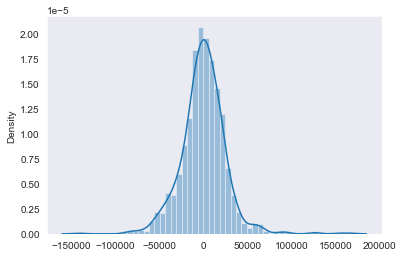

In [125]:
# computing the residuals

res = y_train - y_train_pred

# plotting distplot to check for the distribution of the residuals

sns.distplot(res)
plt.show()

The residuals are normally distributes as seen from the above plot. Hence, our assumption is verified.

In [151]:
print(sorted(list(zip(lr_model_17.params, X_train_17))))

[(-92479.96608292329, 'Functional_Sev'), (-91732.3757431856, 'PropertyAge'), (-41354.41586986369, 'Foundation_Wood'), (-16755.050105738792, 'GarageType_No_Garage'), (23069.292664120432, 'SaleCondition_Partial'), (42309.448091416125, 'Neighborhood_Crawfor'), (52944.93138697067, 'OverallQual_Very_Good'), (60258.65348139311, 'LotArea'), (71195.17518367503, 'RoofMatl_Membran'), (86357.41956098792, 'BsmtFinSF1'), (102705.84608390584, 'const'), (121851.96917189848, 'OverallQual_Excellent'), (125435.87679873017, '2ndFlrSF'), (136018.6914202133, 'OverallQual_Very_Excellent'), (290406.6983913479, '1stFlrSF')]


So, as seen from the above, we have the list of final variables and their coefficients.

We will now check for Ridge & Lasso Regression.

## Ridge Regression

In [126]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 6
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[col], y_train) 

Fitting 6 folds for each of 30 candidates, totalling 180 fits


GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [127]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.1}


In [128]:
# Fitting Ridge model for alpha = 0.1 and printing coefficients which have been penalised
alpha = 0.1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[col], y_train)
print(ridge.coef_)

[ 91985.41880642 102511.21433339  90109.1672226  311461.46935059
 150301.88409249 -37773.72499217 -87997.79120897 107518.81683008
 -72650.05281335  36229.15560565 -86789.43731139 105063.37183069
 133310.99348084  43225.7049797   50374.83912705 460368.13186199
 461364.34528884 431674.50265167 458046.02064313 425636.19463388
 427093.7285664  -41463.70697991 -94172.1289537   24071.17244219
  24071.17244214  24071.17244214  24071.17244214  35039.86286936
  85168.43144051 -59057.03110538]


In [129]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train[col])
y_pred_test = ridge.predict(X_test[col])

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8859758974085133
0.6061560262995643
835900522319.9167
713718351400.188
718127596.4947739
2452640382.8185153


In [130]:
print(sorted(list(zip(ridge.coef_, X_train[col]))))

[(-94172.12895369573, 'Functional_Sev'), (-87997.79120897208, 'KitchenAbvGr'), (-86789.43731138746, 'Condition2_RRAe'), (-72650.05281334846, 'PropertyAge'), (-59057.0311053774, 'SaleCondition_Partial'), (-41463.7069799092, 'Foundation_Wood'), (-37773.72499217109, 'BedroomAbvGr'), (24071.172442135794, 'GarageQual_No_Garage'), (24071.172442140443, 'GarageCond_No_Garage'), (24071.17244214045, 'GarageFinish_No_Garage'), (24071.172442192805, 'GarageType_No_Garage'), (35039.86286936366, 'SaleType_Con'), (36229.15560565154, 'Neighborhood_Crawfor'), (43225.70497970448, 'OverallQual_Very_Good'), (50374.839127053834, 'RoofStyle_Shed'), (85168.43144051298, 'SaleType_New'), (90109.16722259832, 'TotalBsmtSF'), (91985.41880641511, 'LotArea'), (102511.21433339122, 'BsmtFinSF1'), (105063.37183069407, 'OverallQual_Excellent'), (107518.81683007894, 'GarageYrBlt'), (133310.99348084096, 'OverallQual_Very_Excellent'), (150301.88409249354, '2ndFlrSF'), (311461.469350594, '1stFlrSF'), (425636.19463388034, 'R

Above are the final variables with their coefficients received from the final ridge model.

As seen from the above list of parameters, we can say that the top 05 predictor variables are,<br>
'RoofMatl_Membran'<br>
'RoofMatl_CompShg'<br>
'RoofMatl_Tar&Grv'<br>
'RoofMatl_Metal'<br>
'RoofMatl_WdShngl'

## Lasso Regression

In [131]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[col], y_train) 

Fitting 6 folds for each of 30 candidates, totalling 180 fits


GridSearchCV(cv=6, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [132]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 40}


In [133]:
# Fitting Lasso model for alpha = 40 and printing coefficients which have been penalised

alpha = 40

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[col], y_train) 

Lasso(alpha=40)

In [134]:
lasso.coef_

array([ 85742.46131208,  98103.51206533,  74028.12809752, 316961.33245279,
       147249.54287246, -33815.80429201, -86393.79336454,   8936.04259042,
       -77639.84425428,  35047.12997089,     -0.        , 106125.56726462,
       133045.99111997,  44132.01970636,      0.        , 428141.59013155,
       431482.97157035, 397943.53642526, 413487.00631204, 405041.72146078,
       397938.83291206, -26797.79246082, -44066.87583408,     -0.        ,
           -0.        ,     -0.        ,     -0.        ,  14603.34656636,
        26210.60954504,     -0.        ])

In [135]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train[col])
y_pred_test = lasso.predict(X_test[col])

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8810359374600992
0.6309011291430133
872114927934.7792
668875634014.6282
749239628.8099477
2298541697.64477


In [136]:
print(sorted(list(zip(lasso.coef_, X_train[col]))))

[(-86393.79336453596, 'KitchenAbvGr'), (-77639.84425428335, 'PropertyAge'), (-44066.87583408215, 'Functional_Sev'), (-33815.80429200833, 'BedroomAbvGr'), (-26797.79246081736, 'Foundation_Wood'), (-0.0, 'Condition2_RRAe'), (-0.0, 'GarageCond_No_Garage'), (-0.0, 'GarageFinish_No_Garage'), (-0.0, 'GarageQual_No_Garage'), (-0.0, 'GarageType_No_Garage'), (0.0, 'RoofStyle_Shed'), (-0.0, 'SaleCondition_Partial'), (8936.042590415895, 'GarageYrBlt'), (14603.346566361004, 'SaleType_Con'), (26210.609545040494, 'SaleType_New'), (35047.12997088614, 'Neighborhood_Crawfor'), (44132.01970635856, 'OverallQual_Very_Good'), (74028.12809752233, 'TotalBsmtSF'), (85742.46131208024, 'LotArea'), (98103.51206532527, 'BsmtFinSF1'), (106125.56726462234, 'OverallQual_Excellent'), (133045.99111996804, 'OverallQual_Very_Excellent'), (147249.54287246152, '2ndFlrSF'), (316961.3324527944, '1stFlrSF'), (397938.8329120594, 'RoofMatl_WdShngl'), (397943.53642526205, 'RoofMatl_Metal'), (405041.7214607837, 'RoofMatl_WdShake

Above are the final variables with their coefficients received from the final lasso model.

As seen from the above list of parameters, we can say that the top 05 predictor variables are,<br>
'RoofMatl_Membran'<br>
'RoofMatl_CompShg'<br>
'RoofMatl_Tar&Grv'<br>
'RoofMatl_WdShake'<br>
'RoofMatl_Metal'

## Doubling the alpha values

### Ridge Regression

Earlier, we found the optimal apha value to be 0.1. After doubling, it becomes 0.2. 

In [137]:
# Fitting Ridge model for alpha = 0.2 and printing coefficients which have been penalised
alpha = 0.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[col], y_train)
print(ridge.coef_)

[ 87740.44997021  91835.00159941  79469.73739072 301418.57891747
 145368.40261497 -33375.36420966 -86242.63024913  65757.81868682
 -76462.42037738  36945.75332537 -73428.37264659 108752.62956341
 130704.93899166  45390.42594159  45598.16237466 326178.36364909
 313213.93857965 285378.16098519 319935.13988271 291274.13988643
 292556.66420926 -39589.76799675 -81233.06379565  13561.4465018
  13561.44650178  13561.44650178  13561.44650178  34239.91049463
  67886.22105389 -42694.53783851]


In [138]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train[col])
y_pred_test = ridge.predict(X_test[col])

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8733735158598965
0.6705635534450344
928287457007.7952
596999962490.6946
797497815.2987931
2051546262.8546205


In [139]:
print(sorted(list(zip(ridge.coef_, X_train[col]))))

[(-86242.63024913316, 'KitchenAbvGr'), (-81233.06379564578, 'Functional_Sev'), (-76462.42037737982, 'PropertyAge'), (-73428.3726465944, 'Condition2_RRAe'), (-42694.53783850638, 'SaleCondition_Partial'), (-39589.76799674866, 'Foundation_Wood'), (-33375.364209658735, 'BedroomAbvGr'), (13561.44650177599, 'GarageQual_No_Garage'), (13561.446501778313, 'GarageCond_No_Garage'), (13561.446501778319, 'GarageFinish_No_Garage'), (13561.446501798559, 'GarageType_No_Garage'), (34239.91049462524, 'SaleType_Con'), (36945.75332536526, 'Neighborhood_Crawfor'), (45390.42594158683, 'OverallQual_Very_Good'), (45598.16237466464, 'RoofStyle_Shed'), (65757.81868682211, 'GarageYrBlt'), (67886.22105389398, 'SaleType_New'), (79469.73739071976, 'TotalBsmtSF'), (87740.44997021122, 'LotArea'), (91835.00159940931, 'BsmtFinSF1'), (108752.62956340954, 'OverallQual_Excellent'), (130704.93899166475, 'OverallQual_Very_Excellent'), (145368.40261497436, '2ndFlrSF'), (285378.16098518844, 'RoofMatl_Metal'), (291274.13988643

After doubling the alpha value for ridge regression, we can say that the top 05 predictor variables are,<br>
'RoofMatl_CompShg'<br>
'RoofMatl_Tar&Grv'<br>
'RoofMatl_Membran'<br>
'1stFlrSF'<br>
'RoofMatl_WdShngl'

### Lasso Regression

Earlier, we found the optimal apha value to be 40. After doubling, it becomes 80. 

In [140]:
# Fitting Lasso model for alpha = 80 and printing coefficients which have been penalised

alpha = 80

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[col], y_train) 

Lasso(alpha=80)

In [141]:
lasso.coef_

array([ 69745.11363611,  69279.70075693,  21413.30901802, 312656.67443268,
       134183.01723726, -21098.84687558, -80651.65021167,  11877.03472153,
       -83864.19449845,  36128.77737225,     -0.        , 114928.65000382,
       124093.99027402,  49077.70032469,      0.        ,  59568.91267405,
        26157.1755718 ,      0.        ,  37705.06169363,  29218.9107305 ,
        29451.30560009,  -9847.96724903,     -0.        ,     -0.        ,
           -0.        ,     -0.        ,     -0.        ,      0.        ,
        23162.26674527,      0.        ])

In [142]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train[col])
y_pred_test = lasso.predict(X_test[col])

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8343182005256765
0.7337331764207723
1214598489020.0837
482524885608.8334
1043469492.2852954
1658161118.9306989


In [143]:
print(sorted(list(zip(lasso.coef_, X_train[col]))))

[(-83864.19449845496, 'PropertyAge'), (-80651.65021166879, 'KitchenAbvGr'), (-21098.84687557875, 'BedroomAbvGr'), (-9847.967249033845, 'Foundation_Wood'), (-0.0, 'Condition2_RRAe'), (-0.0, 'Functional_Sev'), (-0.0, 'GarageCond_No_Garage'), (-0.0, 'GarageFinish_No_Garage'), (-0.0, 'GarageQual_No_Garage'), (-0.0, 'GarageType_No_Garage'), (0.0, 'RoofMatl_Metal'), (0.0, 'RoofStyle_Shed'), (0.0, 'SaleCondition_Partial'), (0.0, 'SaleType_Con'), (11877.034721533477, 'GarageYrBlt'), (21413.30901802283, 'TotalBsmtSF'), (23162.26674526955, 'SaleType_New'), (26157.175571798896, 'RoofMatl_Membran'), (29218.91073049736, 'RoofMatl_WdShake'), (29451.30560008874, 'RoofMatl_WdShngl'), (36128.77737224726, 'Neighborhood_Crawfor'), (37705.06169363291, 'RoofMatl_Tar&Grv'), (49077.700324689315, 'OverallQual_Very_Good'), (59568.91267405098, 'RoofMatl_CompShg'), (69279.70075693028, 'BsmtFinSF1'), (69745.1136361068, 'LotArea'), (114928.650003823, 'OverallQual_Excellent'), (124093.99027401659, 'OverallQual_Very

As seen from the above list of parameters, we can say that the top 05 predictor variables are,<br>
'1stFlrSF'<br>
'2ndFlrSF'<br>
'OverallQual_Very_Excellent'<br>
'OverallQual_Excellent'<br>
'LotArea'

## Removing the top 05 predictor variables in Lasso regression

Earlier, the top 05 predictor variables as seen from the lasso regression model were,

'RoofMatl_Membran'<br>
'RoofMatl_CompShg'<br>
'RoofMatl_Tar&Grv'<br>
'RoofMatl_WdShake'<br>
'RoofMatl_Metal'

In [144]:
X_train_lasso = X_train[col]

In [145]:
# dropping the above mentioned variables from the dataset

X_train_lasso = X_train_lasso.drop(['RoofMatl_Membran',
                                    'RoofMatl_CompShg',
                                    'RoofMatl_Tar&Grv',
                                    'RoofMatl_WdShake',
                                    'RoofMatl_Metal'], axis = 1)

In [146]:
# Fitting Lasso model for alpha = 40 and printing coefficients which have been penalised

alpha = 40

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train) 

Lasso(alpha=40)

In [147]:
lasso.coef_

array([ 55477.43505568,  67160.10047068,  28098.98299084, 307972.56839447,
       136025.4574856 , -20549.58912812, -85329.8996539 ,  12719.74570322,
       -84024.69024234,  38170.81696168,     -0.        , 116524.50816881,
       125044.75940205,  49277.96019467,      0.        ,      0.        ,
       -24698.89100653, -51798.80809711,     -0.        ,     -0.        ,
           -0.        ,     -0.        ,  17436.62557016,  23256.49106797,
           -0.        ])

In [148]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_lasso)
y_pred_test = lasso.predict(X_test[X_train_lasso.columns])

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8290455002816879
0.7506038587398265
1253252184053.1157
451952079178.3604
1076677134.0662506
1553099928.447974


In [149]:
print(sorted(list(zip(lasso.coef_, X_train_lasso))))

[(-85329.89965390119, 'KitchenAbvGr'), (-84024.69024233788, 'PropertyAge'), (-51798.808097107016, 'Functional_Sev'), (-24698.891006531438, 'Foundation_Wood'), (-20549.58912812241, 'BedroomAbvGr'), (-0.0, 'Condition2_RRAe'), (-0.0, 'GarageCond_No_Garage'), (-0.0, 'GarageFinish_No_Garage'), (-0.0, 'GarageQual_No_Garage'), (-0.0, 'GarageType_No_Garage'), (0.0, 'RoofMatl_WdShngl'), (0.0, 'RoofStyle_Shed'), (-0.0, 'SaleCondition_Partial'), (12719.745703218694, 'GarageYrBlt'), (17436.62557016381, 'SaleType_Con'), (23256.491067969375, 'SaleType_New'), (28098.9829908409, 'TotalBsmtSF'), (38170.81696168066, 'Neighborhood_Crawfor'), (49277.96019467404, 'OverallQual_Very_Good'), (55477.43505568387, 'LotArea'), (67160.10047068393, 'BsmtFinSF1'), (116524.50816881032, 'OverallQual_Excellent'), (125044.7594020507, 'OverallQual_Very_Excellent'), (136025.45748559723, '2ndFlrSF'), (307972.5683944714, '1stFlrSF')]


As seen from the above list of parameters, the top 05 predictor variables now are,<br>
'1stFlrSF'<br>
'2ndFlrSF'<br>
'OverallQual_Very_Excellent'<br>
'OverallQual_Excellent'<br>
'BsmtFinSF1'